# Wrangle and Analyze "WeRateDogs" Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#conclusions">Summary and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This project will conduct the Data Wrangling process, including Data Gathering, Data Assessing and Data Cleaning of data from Twitter Account of @dog_rates, also known "WeRateDogs". Additionally, the data gathering process contains Twitter Archive Dataset which is manually download via Udacity Webpage, Dataset from programmatical download via requests library and Dataset collected by API via Tweepy. However, in this project the Twitter API dataset is downloaded manually which is included in Udacity course. The wrangling process and the analyses as well as the visualizations are conducted in Jupyter Notebook using Python (and its libraries) and/or SQL.

## About WeRateDogs
>  WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage. WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

## Goals
> Key points to keep in mind when data wrangling for this project:
- Create interesting and trustworthy analyses and visualizations.
- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
    - Cleaning includes merging individual pieces of data according to the rules of tidy data.
    - The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
    - You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

<a id='gather'></a>
## Gathering Data

In [2]:
# Import libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import re
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Display Setting
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1. Gathering Data: Twitter Archive Dataset
The dataset of "twitter_archive_enhanced.csv" is downloaded manually from Udacity webpage.

In [3]:
# Import dataset of twitter-archive-enhanced.csv
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
# Checking first 5 rows of twitter_archive dataframe
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193 NaN                    NaN                    
1  892177421306343426 NaN                    NaN                    
2  891815181378084864 NaN                    NaN                    
3  891689557279858688 NaN                    NaN                    
4  891327558926688256 NaN                    NaN                    

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0 NaN                  NaN                        NaN                         
1 NaN                  NaN                        NaN                         
2 NaN                  NaN                        NaN                         
3 NaN                  NaN                        NaN                         
4 NaN                  NaN                        NaN                         

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0  13                10                  Phineas   None  None    None   None  
1  13                10                  Tilly     None  None    None   None  
2  12                10                  Archie    None  None    None   None  
3  13                10                  Darla     None  None    None   None  
4  12                10                  Franklin  None  None    None   None

In [5]:
# Columns in twitter_archive dataset
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [6]:
# Total rows x columns of dataset
twitter_archive.shape

(2356, 17)

In [7]:
# twitter_archive[twitter_archive['floofer'] != 'None']
# floofer: 800388270626521089

### 2. Gathering Data: Tweet Image Prediction Dataset
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [8]:
# Download File image-predictions.tsv programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv', 'wb') as file:
    response = requests.get(url)
    file.write(response.content)
    
# Load image-predictions.tsv dataset
tweet_image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [9]:
# Checking first 5 rows of twitter_archive dataframe
tweet_image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0  1        Welsh_springer_spaniel  0.465074  True    collie               
1  1        redbone                 0.506826  True    miniature_pinscher   
2  1        German_shepherd         0.596461  True    malinois             
3  1        Rhodesian_ridgeback     0.408143  True    redbone              
4  1        miniature_pinscher      0.560311  True    Rottweiler           

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665  True    Shetland_sheepdog    0.061428  True    
1  0.074192  True    Rhodesian_ridgeback  0.072010  True    
2  0.138584  True    bloodhound           0.116197  True    
3  0.360687  True    miniature_pinscher   0.222752  True    
4  0.243682  True    Doberman             0.154629  True

In [10]:
# Columns in tweet_image_prediction dataset
tweet_image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [11]:
# Total rows x columns of dataset
tweet_image_prediction.shape

(2075, 12)

### 3. Gathering Data: Twitter API Dataset
Twitter API file contains tweet id, favorite count, retweet count, retweeted and display text range. The data of tweet-json.txt is downloaded manually in Udacity webpage and loaded using pandas library in variable named twitter_api_df. However, the code of collecting Twitter API Dataset is stated below.

In [12]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [13]:
# Load tweet-json.txt dataset
with open('tweet-json.txt') as f:
    twitter_api_df = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count', 'retweeted', 'display_text_range'])

# Display the first 5 rows
twitter_api_df.head()

id  favorite_count  retweet_count  retweeted  \
0  892420643555336193  39467           8853           False       
1  892177421306343426  33819           6514           False       
2  891815181378084864  25461           4328           False       
3  891689557279858688  42908           8964           False       
4  891327558926688256  41048           9774           False       

  display_text_range  
0  [0, 85]            
1  [0, 138]           
2  [0, 121]           
3  [0, 79]            
4  [0, 138]

In [14]:
# # Columns in tweet_image_prediction dataset
twitter_api_df.columns

Index(['id', 'favorite_count', 'retweet_count', 'retweeted',
       'display_text_range'],
      dtype='object')

In [15]:
# Total rows x columns of dataset
twitter_api_df.shape

(2354, 5)

<a id='assess'></a>
## Assessing Data
After collecting dataset and store it in pandas dataframe, we begin to assess out dataframes. The data consists in variables:
1. twitter_archive
2. tweet_image_prediction
3. twitter_api_df

Assessing dataset checks the Data Quality which issues: 
- Missing data, 
- Invalid Data, 
- Inaccurate data and 
- Inconsistent Data

The Tidiness must pass the requirement of data, that are: 
- Each variable forms a column, 
- Each observation forms a row and 
- Each type of observational unit forms a table.

### 1. Assessing Data: twitter_archive

In [16]:
# The first 5 rows of dataset
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193 NaN                    NaN                    
1  892177421306343426 NaN                    NaN                    
2  891815181378084864 NaN                    NaN                    
3  891689557279858688 NaN                    NaN                    
4  891327558926688256 NaN                    NaN                    

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0 NaN                  NaN                        NaN                         
1 NaN                  NaN                        NaN                         
2 NaN                  NaN                        NaN                         
3 NaN                  NaN                        NaN                         
4 NaN                  NaN                        NaN                         

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0  13                10                  Phineas   None  None    None   None  
1  13                10                  Tilly     None  None    None   None  
2  12                10                  Archie    None  None    None   None  
3  13                10                  Darla     None  None    None   None  
4  12                10                  Franklin  None  None    None   None

In [17]:
# The last 5 rows of dataset
twitter_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465 NaN                    NaN                    
2352  666044226329800704 NaN                    NaN                    
2353  666033412701032449 NaN                    NaN                    
2354  666029285002620928 NaN                    NaN                    
2355  666020888022790149 NaN                    NaN                    

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                                                  source  \
2351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2353  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2354  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2355  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                             text  \
2351  Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq                      
2352  This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx     
2353  Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR            
2354  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2355  Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj           

      retweeted_status_id  retweeted_status_user_id  \
2351 NaN                  NaN                         
2352 NaN                  NaN                         
2353 NaN                  NaN                         
2354 NaN                  NaN                         
2355 NaN                  NaN                         

     retweeted_status_timestamp  \
2351  NaN                         
2352  NaN                         
2353  NaN                         
2354  NaN                         
2355  NaN                         

                                                        expanded_urls  \
2351  https://twitter.com/dog_rates/status/666049248165822465/photo/1   
2352  https://twitter.com/dog_rates/status/666044226329800704/photo/1   
2353  https://twitter.com/dog_rates/status/666033412701032449/photo/1   
2354  https://twitter.com/dog_rates/status/666029285002620928/photo/1   
2355  https://twitter.com/dog_rates/status/666020888022790149/photo/1   

      rating_numerator  rating_denominator  name doggo floofer pupper puppo  
2351  5                 10                  None  None  None    None   None  
2352  6                 10                  a     None  None    None   None  
2353  9                 10                  a     None  None    None   None  
2354  7                 10                  a     None  None    None   None  
2355  8                 10                  None  None  None    None   None

In [18]:
# Information of dataset, including missing values, data type and total columns as well as memory usage
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

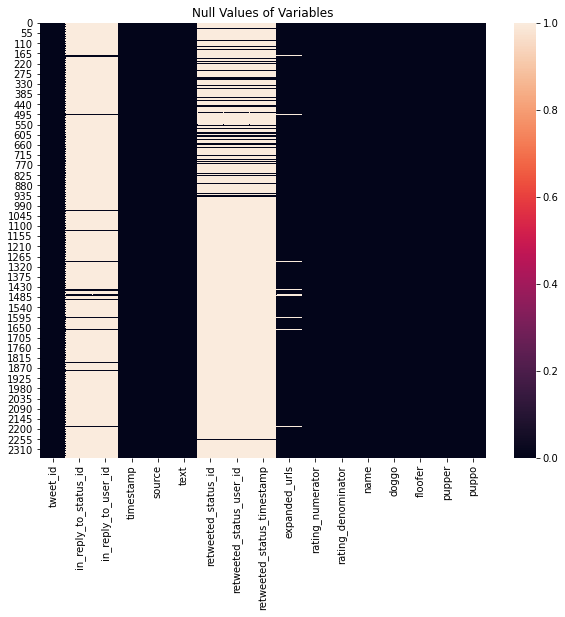

In [19]:
# Visualizing Missing Values
plt.figure(figsize=(10, 8))
sns.heatmap(twitter_archive.isnull())
plt.title('Null Values of Variables')
plt.show()

In [20]:
# Checking percentage of null values
twitter_archive.isnull().sum()/len(twitter_archive) * 100

tweet_id                      0.000000 
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                     0.000000 
source                        0.000000 
text                          0.000000 
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                 2.504244 
rating_numerator              0.000000 
rating_denominator            0.000000 
name                          0.000000 
doggo                         0.000000 
floofer                       0.000000 
pupper                        0.000000 
puppo                         0.000000 
dtype: float64

As we can see, the variables that contain null values are:
1. in_reply_to_status_id: 96.69%
2. in_reply_to_user_id: 96.69%
3. retweet_status_id: 92.32%
4. retweet_status_user_id: 92.32%
5. retweet_status_timestamp: 92.32%
6. expanded_urls: 2.50%

In [21]:
# Checking twitter_archive which retweeted_status_id value is not null
# Check the 'retweet' observation
twitter_archive[~twitter_archive['retweeted_status_id'].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257 NaN                    NaN                    
32    886054160059072513 NaN                    NaN                    
36    885311592912609280 NaN                    NaN                    
68    879130579576475649 NaN                    NaN                    
73    878404777348136964 NaN                    NaN                    
74    878316110768087041 NaN                    NaN                    
78    877611172832227328 NaN                    NaN                    
91    874434818259525634 NaN                    NaN                    
95    873697596434513921 NaN                    NaN                    
97    873337748698140672 NaN                    NaN                    
101   872668790621863937 NaN                    NaN                    
109   871166179821445120 NaN                    NaN                    
118   869988702071779329 NaN                    NaN                    
124   868639477480148993 NaN                    NaN                    
130   867072653475098625 NaN                    NaN                    
132   866816280283807744 NaN                    NaN                    
137   866094527597207552 NaN                    NaN                    
146   863471782782697472 NaN                    NaN                    
155   861769973181624320 NaN                    NaN                    
159   860981674716409858 NaN                    NaN                    
160   860924035999428608 NaN                    NaN                    
165   860177593139703809 NaN                    NaN                    
171   858860390427611136 NaN                    NaN                    
180   857062103051644929 NaN                    NaN                    
182   856602993587888130 NaN                    NaN                    
185   856330835276025856 NaN                    NaN                    
194   855245323840757760 NaN                    NaN                    
195   855138241867124737 NaN                    NaN                    
204   852936405516943360 NaN                    NaN                    
211   851953902622658560 NaN                    NaN                    
212   851861385021730816 NaN                    NaN                    
222   849668094696017920 NaN                    NaN                    
230   847978865427394560 NaN                    NaN                    
231   847971574464610304 NaN                    NaN                    
247   845459076796616705 NaN                    NaN                    
250   845098359547420673 NaN                    NaN                    
260   842892208864923648 NaN                    NaN                    
266   841833993020538882 NaN                    NaN                    
272   840761248237133825 NaN                    NaN                    
273   840728873075638272 NaN                    NaN                    
281   839290600511926273 NaN                    NaN                    
285   838916489579200512 NaN                    NaN                    
286   838831947270979586 NaN                    NaN                    
289   838201503651401729 NaN                    NaN                    
298   837012587749474308 NaN                    NaN                    
302   836648853927522308 NaN                    NaN                    
303   836397794269200385 NaN                    NaN                    
307   835685285446955009 NaN                    NaN                    
309   835536468978302976 NaN                    NaN                    
310   835309094223372289 NaN                    NaN                    
319   834477809192075265 NaN                    NaN                    
327   833732339549220864 NaN                    NaN                    
332   832769181346996225 NaN                    NaN                    
340   832215909146226688 NaN                    NaN                    
341   832215726631055365 NaN                    NaN     

In [22]:
# Total rows of twitter_archive which retweeted_status_id is not null
len(twitter_archive[~twitter_archive['retweeted_status_id'].isnull()])

181

In [23]:
# Checking the Not Retweeted Status
for idx, txt in enumerate(twitter_archive[~twitter_archive['retweeted_status_id'].isnull()]['text']):
    if 'RT @' not in txt:
        print(True)

In [24]:
# Checking the Retweeted Status
for idx, txt in enumerate(twitter_archive[twitter_archive['retweeted_status_id'].isnull()]['text']):
    if 'RT @' in txt:
        print(True)

As we can see, all of columns with Not Null retweeted_status_id and retweeted_status_user_id values have text variables with the prefix "RT" in their tweets and have expanded_urls. This indicated that those are retweets observation.

In [25]:
# Checking 5 sample to visually check the data quality
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1828  676263575653122048 NaN                    NaN                    
2111  670442337873600512 NaN                    NaN                    
421   821886076407029760 NaN                    NaN                    
1756  678767140346941444 NaN                    NaN                    
748   779377524342161408 NaN                    NaN                    

                      timestamp  \
1828  2015-12-14 04:52:55 +0000   
2111  2015-11-28 03:21:24 +0000   
421   2017-01-19 01:04:45 +0000   
1756  2015-12-21 02:41:11 +0000   
748   2016-09-23 17:50:56 +0000   

                                                                                  source  \
1828  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2111  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
421   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1756  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
748   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                           text  \
1828  All this pupper wanted to do was go skiing. No one told him about the El Niño. Poor pupper. 10/10 maybe next year https://t.co/fTgbq1UBR9   
2111  Meet Koda. He's large. Looks very soft. Great bangs. Powerful owner. 11/10 would pet the hell out of https://t.co/mzPoS9wCqp                
421   This is Jimison. He was just called a good boy. 13/10 https://t.co/djMep7mGkV                                                               
1756  This is Mia. She makes awful decisions. 8/10 https://t.co/G6TQVgTcZz                                                                        
748   Have you ever seen such a smol pupper? Portable af. 12/10 would keep in shirt pocket https://t.co/KsqaIzlQ12                                

      retweeted_status_id  retweeted_status_user_id  \
1828 NaN                  NaN                         
2111 NaN                  NaN                         
421  NaN                  NaN                         
1756 NaN                  NaN                         
748  NaN                  NaN                         

     retweeted_status_timestamp  \
1828  NaN                         
2111  NaN                         
421   NaN                         
1756  NaN                         
748   NaN                         

                                                        expanded_urls  \
1828  https://twitter.com/dog_rates/status/676263575653122048/photo/1   
2111  https://twitter.com/dog_rates/status/670442337873600512/photo/1   
421   https://twitter.com/dog_rates/status/821886076407029760/photo/1   
1756  https://twitter.com/dog_rates/status/678767140346941444/photo/1   
748   https://twitter.com/dog_rates/status/779377524342161408/video/1   

      rating_numerator  rating_denominator     name doggo floofer  pupper  \
1828  10                10                  None     None  None    pupper   
2111  11                10                  Koda     None  None    None     
421   13                10                  Jimison  None  None    None     
1756  8                 10                  Mia      None  None    None     
748   12                10                  None     None  None    pupper   

     puppo  
1828  None  
2111  None  
421   None  
1756  None  
748   None

In [26]:
# Check for duplicated values of tweet_id variable
twitter_archive['tweet_id'].duplicated().sum()

0

In [27]:
# Checking in_reply_to_status_id which is not null value
# Reply Tweets
twitter_archive[twitter_archive['in_reply_to_status_id'].isnull() == False]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600  8.862664e+17           2.281182e+09          
55    881633300179243008  8.816070e+17           4.738443e+07          
64    879674319642796034  8.795538e+17           3.105441e+09          
113   870726314365509632  8.707262e+17           1.648776e+07          
148   863427515083354112  8.634256e+17           7.759620e+07          
149   863079547188785154  6.671522e+17           4.196984e+09          
179   857214891891077121  8.571567e+17           1.806710e+08          
184   856526610513747968  8.558181e+17           4.196984e+09          
186   856288084350160898  8.562860e+17           2.792810e+08          
188   855862651834028034  8.558616e+17           1.943518e+08          
189   855860136149123072  8.558585e+17           1.361572e+07          
218   850333567704068097  8.503288e+17           2.195506e+07          
228   848213670039564288  8.482121e+17           4.196984e+09          
234   847617282490613760  8.476062e+17           4.196984e+09          
251   844979544864018432  7.590995e+17           4.196984e+09          
274   840698636975636481  8.406983e+17           8.405479e+17          
290   838150277551247360  8.381455e+17           2.195506e+07          
291   838085839343206401  8.380855e+17           2.894131e+09          
313   835246439529840640  8.352460e+17           2.625958e+07          
342   832088576586297345  8.320875e+17           3.058208e+07          
346   831926988323639298  8.319030e+17           2.068372e+07          
387   826598799820865537  8.265984e+17           4.196984e+09          
409   823333489516937216  8.233264e+17           1.582854e+09          
427   821153421864615936  8.211526e+17           1.132119e+08          
498   813130366689148928  8.131273e+17           4.196984e+09          
513   811647686436880384  8.116272e+17           4.196984e+09          
565   802265048156610565  7.331095e+17           4.196984e+09          
570   801854953262350336  8.018543e+17           1.185634e+07          
576   800859414831898624  8.008580e+17           2.918590e+08          
611   797165961484890113  7.971238e+17           2.916630e+07          
701   786051337297522688  7.727430e+17           7.305050e+17          
843   766714921925144576  7.667118e+17           4.196984e+09          
857   763956972077010945  7.638652e+17           1.584641e+07          
967   750381685133418496  7.501805e+17           4.717297e+09          
1005  747651430853525504  7.476487e+17           4.196984e+09          
1016  746906459439529985  7.468859e+17           4.196984e+09          
1018  746818907684614144  6.914169e+17           4.196984e+09          
1080  738891149612572673  7.384119e+17           3.589728e+08          
1127  729838605770891264  7.291135e+17           4.196984e+09          
1295  707983188426153984  7.079801e+17           2.319108e+09          
1330  705786532653883392  7.032559e+17           4.196984e+09          
1339  704871453724954624  6.671522e+17           4.196984e+09          
1345  704491224099647488  7.044857e+17           2.878549e+07          
1356  703425003149250560  7.030419e+17           4.196984e+09          
1446  696490539101908992  6.964887e+17           4.196984e+09          
1452  695767669421768709  6.753494e+17           4.196984e+09          
1464  694356675654983680  6.706684e+17           4.196984e+09          
1474  693644216740769793  6.936422e+17           4.196984e+09          
1479  693582294167244802  6.935722e+17           1.198989e+09          
1497  692423280028966913  6.924173e+17           4.196984e+09          
1501  692142790915014657  6.920419e+17           4.196984e+09          
1523  690607260360429569  6.903413e+17           4.670367e+08          
1598  686035780142297088  6.860340e+17           4.196984e+09          
1605  685681090388975616  6.855479e+17           4.196984e+09          
1618  684969860808454144  6.849598e+17           4.19698

In [28]:
# Checking in_reply_to_user_id which is not null value
twitter_archive[twitter_archive['in_reply_to_user_id'].isnull() == False]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600  8.862664e+17           2.281182e+09          
55    881633300179243008  8.816070e+17           4.738443e+07          
64    879674319642796034  8.795538e+17           3.105441e+09          
113   870726314365509632  8.707262e+17           1.648776e+07          
148   863427515083354112  8.634256e+17           7.759620e+07          
149   863079547188785154  6.671522e+17           4.196984e+09          
179   857214891891077121  8.571567e+17           1.806710e+08          
184   856526610513747968  8.558181e+17           4.196984e+09          
186   856288084350160898  8.562860e+17           2.792810e+08          
188   855862651834028034  8.558616e+17           1.943518e+08          
189   855860136149123072  8.558585e+17           1.361572e+07          
218   850333567704068097  8.503288e+17           2.195506e+07          
228   848213670039564288  8.482121e+17           4.196984e+09          
234   847617282490613760  8.476062e+17           4.196984e+09          
251   844979544864018432  7.590995e+17           4.196984e+09          
274   840698636975636481  8.406983e+17           8.405479e+17          
290   838150277551247360  8.381455e+17           2.195506e+07          
291   838085839343206401  8.380855e+17           2.894131e+09          
313   835246439529840640  8.352460e+17           2.625958e+07          
342   832088576586297345  8.320875e+17           3.058208e+07          
346   831926988323639298  8.319030e+17           2.068372e+07          
387   826598799820865537  8.265984e+17           4.196984e+09          
409   823333489516937216  8.233264e+17           1.582854e+09          
427   821153421864615936  8.211526e+17           1.132119e+08          
498   813130366689148928  8.131273e+17           4.196984e+09          
513   811647686436880384  8.116272e+17           4.196984e+09          
565   802265048156610565  7.331095e+17           4.196984e+09          
570   801854953262350336  8.018543e+17           1.185634e+07          
576   800859414831898624  8.008580e+17           2.918590e+08          
611   797165961484890113  7.971238e+17           2.916630e+07          
701   786051337297522688  7.727430e+17           7.305050e+17          
843   766714921925144576  7.667118e+17           4.196984e+09          
857   763956972077010945  7.638652e+17           1.584641e+07          
967   750381685133418496  7.501805e+17           4.717297e+09          
1005  747651430853525504  7.476487e+17           4.196984e+09          
1016  746906459439529985  7.468859e+17           4.196984e+09          
1018  746818907684614144  6.914169e+17           4.196984e+09          
1080  738891149612572673  7.384119e+17           3.589728e+08          
1127  729838605770891264  7.291135e+17           4.196984e+09          
1295  707983188426153984  7.079801e+17           2.319108e+09          
1330  705786532653883392  7.032559e+17           4.196984e+09          
1339  704871453724954624  6.671522e+17           4.196984e+09          
1345  704491224099647488  7.044857e+17           2.878549e+07          
1356  703425003149250560  7.030419e+17           4.196984e+09          
1446  696490539101908992  6.964887e+17           4.196984e+09          
1452  695767669421768709  6.753494e+17           4.196984e+09          
1464  694356675654983680  6.706684e+17           4.196984e+09          
1474  693644216740769793  6.936422e+17           4.196984e+09          
1479  693582294167244802  6.935722e+17           1.198989e+09          
1497  692423280028966913  6.924173e+17           4.196984e+09          
1501  692142790915014657  6.920419e+17           4.196984e+09          
1523  690607260360429569  6.903413e+17           4.670367e+08          
1598  686035780142297088  6.860340e+17           4.196984e+09          
1605  685681090388975616  6.855479e+17           4.196984e+09          
1618  684969860808454144  6.849598e+17           4.19698

In [29]:
# Checking Maximum and Minimum Tweets Timestamp
print('Maximum Tweets Timestamp: ' + str(twitter_archive.timestamp.max()) + ' and Minimum Tweets Timestamp: ' + str(twitter_archive.timestamp.min()))

Maximum Tweets Timestamp: 2017-08-01 16:23:56 +0000 and Minimum Tweets Timestamp: 2015-11-15 22:32:08 +0000


In [30]:
# Checking Value Counts of "source" variable
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

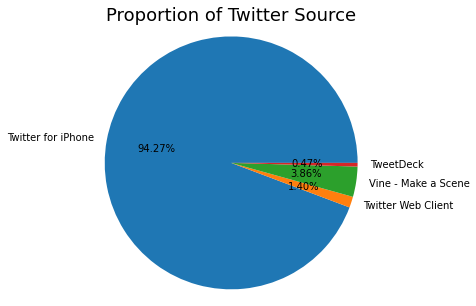

In [31]:
# Visual Proportion of Twitter Source
source = {}
for s in twitter_archive['source']:
    s_re = re.findall(r'>(.*?)<', s)
    if s_re[0] not in source:
        source[s_re[0]] = 1
    else:
        source[s_re[0]] += 1

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(source.values(), labels=source.keys(), autopct='%1.2f%%', startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Twitter Source', fontsize=18)
plt.show();

In [32]:
# Description of rating_numerator
twitter_archive.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

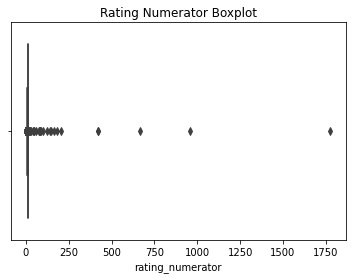

In [33]:
# Boxplot of Rating Numerator
sns.boxplot(twitter_archive['rating_numerator']);
plt.title('Rating Numerator Boxplot');

Rating Numerator has many outliers value.

In [34]:
# Description of rating_denominator
twitter_archive.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

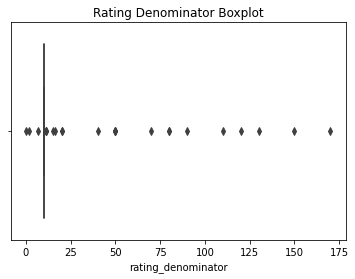

In [35]:
# Boxplot of rating_denominator
sns.boxplot(twitter_archive['rating_denominator']);
plt.title('Rating Denominator Boxplot');

Rating Denominator Value has to be 10. There are observation which value is not 10.

In [36]:
# Value counts of rating_denominator
twitter_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [37]:
# Value counts of Top 20 Name
twitter_archive['name'].value_counts()[:20]

None       745
a          55 
Charlie    12 
Oliver     11 
Lucy       11 
Cooper     11 
Penny      10 
Lola       10 
Tucker     10 
Winston    9  
Bo         9  
Sadie      8  
the        8  
Daisy      7  
Bailey     7  
Buddy      7  
Toby       7  
an         7  
Leo        6  
Koda       6  
Name: name, dtype: int64

In [38]:
# Sorted unique dogs name
sorted(twitter_archive['name'].unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [39]:
# Total odd dog names
len(['a','actually', 'all','an','by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'])

25

In [40]:
# Checking 10 samples 
twitter_archive[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].sample(10)

tweet_id  \
1988  672834301050937345   
601   798665375516884993   
779   775842724423557120   
1033  745074613265149952   
369   828650029636317184   
724   782747134529531904   
1408  699072405256409088   
734   781251288990355457   
2260  667550882905632768   
2242  667911425562669056   

                                                                                                                                            text  \
1988  This is Ed. He's not mad, just disappointed. 10/10 https://t.co/BIljU0zhLN                                                                   
601   RT @dog_rates: This is Lola. She fell asleep on a piece of pizza. 10/10 frighteningly relatable https://t.co/eqmkr2gmPH                      
779   This is Blue. He was having an average day until his owner told him about Bront. 12/10 h*ckin hysterical af https://t.co/saRYTcxQeH          
1033  This is Jeffrey. He wasn't prepared to execute such advanced barkour. Still 11/10 would totally pet https://t.co/MuuwkkLrHh                  
369   Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK                                     
724   This is Deacon. He's the happiest almost dry doggo I've ever seen. 11/10 would smile back https://t.co/C6fUMnHt1H                            
1408  ERMAHGERD 12/10 please enjoy https://t.co/7WrAWKdBac                                                                                         
734   This is Oakley. He just got yelled at for going 46 in a 45. Churlish af. 11/10 would still pet so well https://t.co/xIYsa6LPA4               
2260  RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb                                     
2242  Wow. Armored dog here. Ready for battle. Face looks dangerous. Not very loyal. Lil dog on back havin a blast. 5/10 https://t.co/SyMoWrp368   

      rating_numerator  rating_denominator  
1988  10                10                  
601   10                10                  
779   12                10                  
1033  11                10                  
369   14                10                  
724   11                10                  
1408  12                10                  
734   11                10                  
2260  5                 10                  
2242  5                 10

In [41]:
# Check text variable which contain value of decimal rating numerator
twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45    This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                            
340   RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                        
695   This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                    
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                          
1712  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                          

      rating_numerator  rating_denominator  
45    5                 10                  
340   75                10                  
695   75                10                  
763   27                10                  
1689  5                 10                  
1712  26                10

There are 6 observations which rating numerator are decimal values. Those rating_numerator is error and will be updated in further steps.

In [42]:
# Total text variable which not contain https
len(twitter_archive[~twitter_archive['text'].str.contains(r"(https)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



70

In [43]:
# Display text variable which not contain https
twitter_archive[~twitter_archive['text'].str.contains(r"(https)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

tweet_id  \
30    886267009285017600   
55    881633300179243008   
64    879674319642796034   
101   872668790621863937   
113   870726314365509632   
118   869988702071779329   
148   863427515083354112   
171   858860390427611136   
179   857214891891077121   
182   856602993587888130   
185   856330835276025856   
186   856288084350160898   
188   855862651834028034   
189   855860136149123072   
194   855245323840757760   
195   855138241867124737   
218   850333567704068097   
228   848213670039564288   
234   847617282490613760   
274   840698636975636481   
290   838150277551247360   
291   838085839343206401   
302   836648853927522308   
313   835246439529840640   
319   834477809192075265   
327   833732339549220864   
342   832088576586297345   
346   831926988323639298   
357   830173239259324417   
375   828361771580813312   
387   826598799820865537   
409   823333489516937216   
427   821153421864615936   
479   815745968457060357   
498   813130366689148928   
513   811647686436880384   
570   801854953262350336   
576   800859414831898624   
611   797165961484890113   
701   786051337297522688   
707   785515384317313025   
843   766714921925144576   
857   763956972077010945   
967   750381685133418496   
1005  747651430853525504   
1080  738891149612572673   
1295  707983188426153984   
1345  704491224099647488   
1445  696518437233913856   
1446  696490539101908992   
1474  693644216740769793   
1479  693582294167244802   
1497  692423280028966913   
1523  690607260360429569   
1598  686035780142297088   
1605  685681090388975616   
1618  684969860808454144   
1663  682808988178739200   
1689  681340665377193984   
1774  678023323247357953   
1819  676590572941893632   
1844  675849018447167488   
1895  674742531037511680   
1905  674606911342424069   
1914  674330906434379776   
1940  673716320723169284   
2038  671550332464455680   
2149  669684865554620416   
2189  668967877119254528   
2298  667070482143944705   

                                                                                                                                                                       text  \
30    @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution                                                               
55    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                             
64    @RealKentMurphy 14/10 confirmed                                                                                                                                         
101   RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…                            
113   @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs                                                                                                            
118   RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…                            
148   @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10                                  
171   RT @dog_rates: Meet Winston. He knows he's a little too big for the swing, but he doesn't care. Kindly requests a push. 12/10 would happily…                            
179   @Marc_IRL pixelated af 12/10                                                                                                                                            
182   RT @dog_rates: This is Luna. It's her first time outside and a bee stung her nose. Completely h*ckin uncalled for. 13/10 where's the bee I…                             
185   RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them

There are 70 observations which text's don't have https links.

In [44]:
# Checking for dog category
total_category = []

for index, row in twitter_archive.iterrows():
    temp = 0
    if row['doggo'] != 'None':
        temp += 1
    if row['floofer'] != 'None':
        temp += 1
    if row['pupper'] != 'None':
        temp += 1
    if row['puppo'] != 'None':
        temp += 1
    total_category.append(temp)

twitter_archive['total_category'] = total_category

# There are observation that are more than 1 dog category
# Is all category observation is below 1?
print(all(i <= 1 for i in total_category))

False


In [45]:
# Checking rating_denominator of 0 value
twitter_archive[twitter_archive['rating_denominator'] == 0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640  8.352460e+17           26259576.0            

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                                                 source  \
313  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                   text  \
313  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
313 NaN                  NaN                        NaN                         

    expanded_urls  rating_numerator  rating_denominator  name doggo floofer  \
313  NaN           960               0                   None  None  None     

    pupper puppo  total_category  
313  None   None  0

The rating denominator and rating nominator is error. Because its text stated that the rating nominator is 13 and rating denominator is 10.

In [46]:
# Percentage of total_category
twitter_archive.total_category.value_counts()/len(twitter_archive) * 100

0    83.870968
1    15.534805
2    0.594228 
Name: total_category, dtype: float64

In [47]:
# Dog which has more than 1 category
twitter_archive[twitter_archive.total_category > 1]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
191   855851453814013952 NaN                    NaN                    
200   854010172552949760 NaN                    NaN                    
460   817777686764523521 NaN                    NaN                    
531   808106460588765185 NaN                    NaN                    
565   802265048156610565  7.331095e+17           4.196984e+09          
575   801115127852503040 NaN                    NaN                    
705   785639753186217984 NaN                    NaN                    
733   781308096455073793 NaN                    NaN                    
778   775898661951791106 NaN                    NaN                    
822   770093767776997377 NaN                    NaN                    
889   759793422261743616 NaN                    NaN                    
956   751583847268179968 NaN                    NaN                    
1063  741067306818797568 NaN                    NaN                    
1113  733109485275860992 NaN                    NaN                    

                      timestamp  \
191   2017-04-22 18:31:02 +0000   
200   2017-04-17 16:34:26 +0000   
460   2017-01-07 16:59:28 +0000   
531   2016-12-12 00:29:28 +0000   
565   2016-11-25 21:37:47 +0000   
575   2016-11-22 17:28:25 +0000   
705   2016-10-11 00:34:48 +0000   
733   2016-09-29 01:42:20 +0000   
778   2016-09-14 03:27:11 +0000   
822   2016-08-29 03:00:36 +0000   
889   2016-07-31 16:50:42 +0000   
956   2016-07-09 01:08:47 +0000   
1063  2016-06-10 00:39:48 +0000   
1113  2016-05-19 01:38:16 +0000   

                                                                                  source  \
191   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
200   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
460   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
531   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
565   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
575   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
705   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
733   <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                      
778   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
822   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
889   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
956   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1063  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1113  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                      text  \
191   Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel         
200   At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk   
460   This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7   
531   Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                       
565   Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze                                                                                   

There are 83.87% observations that don't have dog category, 15.54% have 1 dog category and 0.59% have 2 dog categories.

In [48]:
# rating_numerator is not always greater than rating_denominator
(twitter_archive['rating_numerator'] > twitter_archive['rating_denominator']).all()

False

### twitter_archive
<b>Quality:</b>
1. There are missing values in variables: in_reply_to_status_id, in_reply_to_user_id, retweet_status_id, retweet_status_user_id, retweet_status_timestamp, expanded_urls.
2. Some Rating Numerator are different from text variables which contain decimal ratings. For example, tweet_id of 883482846933004288 said that the rating is 13.5, but its rating_numerator states 5 instead of 13.5.
3. All the rating_denominator values are not 10. Whereas, the project overview stated that ratings almost always have a denominator of 10.
4. Tweet_id of 835246439529840640 has 0 value in rating_denominator.
5. The variables of doggo, floofer, pupper and puppo contain None value instead of NaN value.
6. There are 25 unusual names of dog, such as 'a', 'actually', 'all', 'an', 'officially', etc.
7. Timestamp datatype is object not datetime.
8. Total of dog category contains 0, 1 and 2 categories of dog.

<b>Tidiness:</b>
1. The text variable consists of tweet text and a link. Therefore, this could be splitted into 2 new variables.
2. The source variable consists of HTML tag. This HTML tag could be deletted and the content/attribute inside HTML tag could be extracted.
3. The doggo, floofer, pupper and puppo is better made in one column because it is one category

### 2. Assessing Data: tweet_image_prediction

In [49]:
# The first 5 rows of dataset
tweet_image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0  1        Welsh_springer_spaniel  0.465074  True    collie               
1  1        redbone                 0.506826  True    miniature_pinscher   
2  1        German_shepherd         0.596461  True    malinois             
3  1        Rhodesian_ridgeback     0.408143  True    redbone              
4  1        miniature_pinscher      0.560311  True    Rottweiler           

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665  True    Shetland_sheepdog    0.061428  True    
1  0.074192  True    Rhodesian_ridgeback  0.072010  True    
2  0.138584  True    bloodhound           0.116197  True    
3  0.360687  True    miniature_pinscher   0.222752  True    
4  0.243682  True    Doberman             0.154629  True

In [50]:
# The last 5 rows of dataset
tweet_image_prediction.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070  2        basset       0.555712  True    English_springer    0.225770   
2071  1        paper_towel  0.170278  False   Labrador_retriever  0.168086   
2072  1        Chihuahua    0.716012  True    malamute            0.078253   
2073  1        Chihuahua    0.323581  True    Pekinese            0.090647   
2074  1        orange       0.097049  False   bagel               0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070  True    German_short-haired_pointer  0.175219  True    
2071  True    spatula                      0.040836  False   
2072  True    kelpie                       0.031379  True    
2073  True    papillon                     0.068957  True    
2074  False   banana                       0.076110  False

In [51]:
# Information of dataset, including missing values, data type and total columns as well as memory usage
tweet_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
# Total rows x columns of dataset
tweet_image_prediction.shape

(2075, 12)

In [53]:
# Columns of dataset
tweet_image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

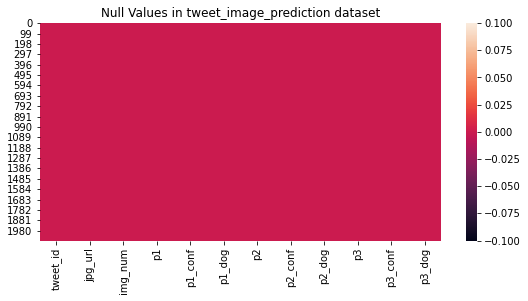

In [54]:
# Visualizing Missing Values
plt.figure(figsize=(9, 4))
sns.heatmap(tweet_image_prediction.isnull());
plt.title('Null Values in tweet_image_prediction dataset');

In [55]:
# Checking percentage of null values
tweet_image_prediction.isnull().sum() / len(tweet_image_prediction) * 100

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [56]:
# Checking for duplicated value
tweet_image_prediction.duplicated().sum()

0

In [57]:
# Check jpg_url which not contain "pbs.twimg.com"
tweet_image_prediction[~tweet_image_prediction['jpg_url'].str.contains(r"(pbs.twimg.com)")]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [58]:
# Value counts of jpg_url variable
tweet_image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                       

In [59]:
# Checking for duplicate value of jpg_url
tweet_image_prediction.jpg_url.duplicated().sum()

66

There are 66 duplicated observations of jpg_url variable.

In [60]:
# Example: Checking duplicated observation of jpg_url
tweet_image_prediction[tweet_image_prediction.jpg_url == 'https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg']

tweet_id                                          jpg_url  \
85    667509364010450944  https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   
1589  798628517273620480  https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   

      img_num      p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
85    1        beagle  0.636169  True    Labrador_retriever  0.119256  True     
1589  1        beagle  0.636169  True    Labrador_retriever  0.119256  True     

                    p3   p3_conf  p3_dog  
85    golden_retriever  0.082549  True    
1589  golden_retriever  0.082549  True

In [61]:
# Value counts of prediction 1
tweet_image_prediction.p1.value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                          89 
Chihuahua                         83 
pug                               57 
chow                              44 
Samoyed                           43 
toy_poodle                        39 
Pomeranian                        38 
cocker_spaniel                    30 
malamute                          30 
French_bulldog                    26 
Chesapeake_Bay_retriever          23 
miniature_pinscher                23 
seat_belt                         22 
Staffordshire_bullterrier         20 
Siberian_husky                    20 
German_shepherd                   20 
web_site                          19 
Cardigan                          19 
Maltese_dog                       18 
Eskimo_dog                        18 
beagle                            18 
teddy                             18 
Shetland_sheepdog                 18 
Shih-Tzu                          17 
Rottweiler  

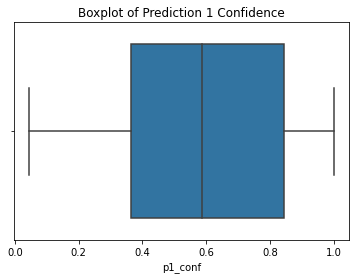

In [62]:
# Boxplot of Prediction 1 Confidence
sns.boxplot(tweet_image_prediction['p1_conf']);
plt.title('Boxplot of Prediction 1 Confidence');

50% of obervations lie between 0.4-0.8 p1_conf.

In [63]:
# Percentge of value count of dog prediction 1 
tweet_image_prediction.p1_dog.value_counts()/len(tweet_image_prediction) * 100

True     73.831325
False    26.168675
Name: p1_dog, dtype: float64

In [64]:
# Calculating Mean and Count of p1_conf by p1 and p1_dog
p1_df = tweet_image_prediction.pivot_table(index=['p1', 'p1_dog'], values='p1_conf', aggfunc=['count', 'mean']).sort_values(by=('count', 'p1_conf'), ascending=False).reset_index()
p1_df.head()

p1 p1_dog   count      mean
                             p1_conf   p1_conf
0  golden_retriever    True   150     0.723555
1  Labrador_retriever  True   100     0.666523
2  Pembroke            True   89      0.718256
3  Chihuahua           True   83      0.586888
4  pug                 True   57      0.757663

In [65]:
# Value count of prediction 2
tweet_image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
Chesapeake_Bay_retriever          41 
French_bulldog                    41 
toy_poodle                        37 
cocker_spaniel                    34 
miniature_poodle                  33 
Siberian_husky                    33 
beagle                            28 
collie                            27 
Eskimo_dog                        27 
Pembroke                          27 
kuvasz                            26 
Italian_greyhound                 22 
American_Staffordshire_terrier    21 
Pekinese                          21 
chow                              20 
miniature_pinscher                20 
toy_terrier                       20 
malinois                          20 
Samoyed                           20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

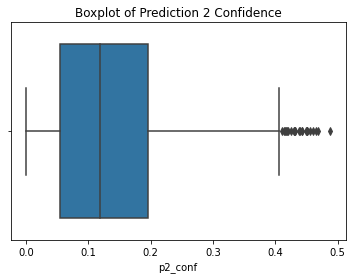

In [66]:
# Boxplot of Prediction 2 Confidence
sns.boxplot(tweet_image_prediction['p2_conf']);
plt.title('Boxplot of Prediction 2 Confidence');

In [67]:
# Percentage of value count of p2_dog
tweet_image_prediction.p2_dog.value_counts()/len(tweet_image_prediction) * 100

True     74.843373
False    25.156627
Name: p2_dog, dtype: float64

In [68]:
# Calculating Mean and Count of p2_conf by p1 and p2_dog
p2_df = tweet_image_prediction.pivot_table(index=['p2', 'p2_dog'], values='p2_conf', aggfunc=['count', 'mean']).sort_values(by=('count', 'p2_conf'), ascending=False).reset_index()
p2_df.head(10)

p2 p2_dog   count      mean
                                   p2_conf   p2_conf
0  Labrador_retriever        True   104     0.122561
1  golden_retriever          True   92      0.168828
2  Cardigan                  True   73      0.135853
3  Chihuahua                 True   44      0.113178
4  Pomeranian                True   42      0.120637
5  French_bulldog            True   41      0.121708
6  Chesapeake_Bay_retriever  True   41      0.135577
7  toy_poodle                True   37      0.147238
8  cocker_spaniel            True   34      0.115464
9  Siberian_husky            True   33      0.218450

In [69]:
# Value count of prediction 3
tweet_image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

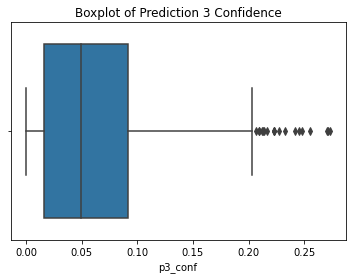

In [70]:
# Boxplot of Prediction 3 Confidence
sns.boxplot(tweet_image_prediction['p3_conf']);
plt.title('Boxplot of Prediction 3 Confidence');

In [71]:
# Percentage of value counts of p3_dog
tweet_image_prediction.p3_dog.value_counts()/len(tweet_image_prediction) * 100

True     72.240964
False    27.759036
Name: p3_dog, dtype: float64

In [72]:
# Calculating Mean and Count of p3_conf by p1 and p3_dog
p3_df = tweet_image_prediction.pivot_table(index=['p3', 'p3_dog'], values='p3_conf', aggfunc=['count', 'mean']).sort_values(by=('count', 'p3_conf'), ascending=False).reset_index()
p3_df.head(10)

p3 p3_dog   count      mean
                                    p3_conf   p3_conf
0  Labrador_retriever         True   79      0.064988
1  Chihuahua                  True   58      0.045909
2  golden_retriever           True   48      0.080381
3  Eskimo_dog                 True   38      0.087353
4  kelpie                     True   35      0.055652
5  kuvasz                     True   34      0.051534
6  Staffordshire_bullterrier  True   32      0.060317
7  chow                       True   32      0.038126
8  cocker_spaniel             True   31      0.045392
9  beagle                     True   31      0.047945

### tweet_image_prediction
<b>Quality:</b>
1. The tweet_image_prediction has 2,075 observations, wherease the twitter_archive has 2,356 data observations.
2. The breed of dog contains different case formatting.
3. The jpg_url contains 66 duplicate values.

<b>Tidiness:</b>
1. The variable name of this dataset in not quite clear.
2. The tweet_image_prediction dataset could be merged with twitter_archive dataset

## 3. Assessing Data: twitter_api_df

In [73]:
# Display first 5 row of dataset
twitter_api_df.head()

id  favorite_count  retweet_count  retweeted  \
0  892420643555336193  39467           8853           False       
1  892177421306343426  33819           6514           False       
2  891815181378084864  25461           4328           False       
3  891689557279858688  42908           8964           False       
4  891327558926688256  41048           9774           False       

  display_text_range  
0  [0, 85]            
1  [0, 138]           
2  [0, 121]           
3  [0, 79]            
4  [0, 138]

In [74]:
# Split the display_text_range into new variable of dtr_idx_0 and dtd_idx_1
twitter_api_df['dtr_idx_0'] = list(map(lambda x: x[0], twitter_api_df['display_text_range']))
twitter_api_df['dtr_idx_1'] = list(map(lambda x: x[1], twitter_api_df['display_text_range']))

In [75]:
# Description of numerical variables
twitter_api_df.describe()

id  favorite_count  retweet_count    dtr_idx_0    dtr_idx_1
count  2.354000e+03  2354.000000     2354.000000    2354.000000  2354.000000
mean   7.426978e+17  8080.968564     3164.797366    0.150807     111.202209 
std    6.852812e+16  11814.771334    5284.770364    1.651985     27.364407  
min    6.660209e+17  0.000000        0.000000       0.000000     11.000000  
25%    6.783975e+17  1415.000000     624.500000     0.000000     93.000000  
50%    7.194596e+17  3603.500000     1473.500000    0.000000     116.000000 
75%    7.993058e+17  10122.250000    3652.000000    0.000000     137.000000 
max    8.924206e+17  132810.000000   79515.000000   30.000000    165.000000

In [76]:
# Checking the null values and the data type of variables
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   favorite_count      2354 non-null   int64 
 2   retweet_count       2354 non-null   int64 
 3   retweeted           2354 non-null   bool  
 4   display_text_range  2354 non-null   object
 5   dtr_idx_0           2354 non-null   int64 
 6   dtr_idx_1           2354 non-null   int64 
dtypes: bool(1), int64(5), object(1)
memory usage: 112.8+ KB


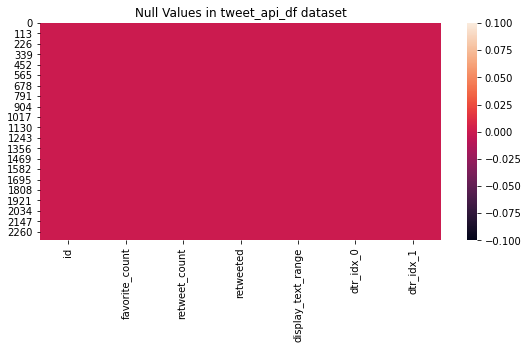

In [77]:
# Visualization of Null values of dataset
plt.figure(figsize=(9, 4))
sns.heatmap(twitter_api_df.isnull());
plt.title('Null Values in tweet_api_df dataset');

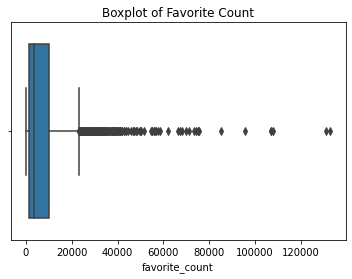

In [78]:
# Boxplot of favorite_count variable
sns.boxplot(twitter_api_df['favorite_count']);
plt.title('Boxplot of Favorite Count');

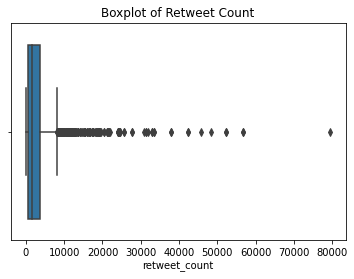

In [79]:
# Boxplot of retweet_count
sns.boxplot(twitter_api_df['retweet_count']);
plt.title('Boxplot of Retweet Count');

In [80]:
# Display the first 5 row of dataset
twitter_api_df.head()

id  favorite_count  retweet_count  retweeted  \
0  892420643555336193  39467           8853           False       
1  892177421306343426  33819           6514           False       
2  891815181378084864  25461           4328           False       
3  891689557279858688  42908           8964           False       
4  891327558926688256  41048           9774           False       

  display_text_range  dtr_idx_0  dtr_idx_1  
0  [0, 85]            0          85         
1  [0, 138]           0          138        
2  [0, 121]           0          121        
3  [0, 79]            0          79         
4  [0, 138]           0          138

In [81]:
# Description of numerical variables
twitter_api_df.describe()

id  favorite_count  retweet_count    dtr_idx_0    dtr_idx_1
count  2.354000e+03  2354.000000     2354.000000    2354.000000  2354.000000
mean   7.426978e+17  8080.968564     3164.797366    0.150807     111.202209 
std    6.852812e+16  11814.771334    5284.770364    1.651985     27.364407  
min    6.660209e+17  0.000000        0.000000       0.000000     11.000000  
25%    6.783975e+17  1415.000000     624.500000     0.000000     93.000000  
50%    7.194596e+17  3603.500000     1473.500000    0.000000     116.000000 
75%    7.993058e+17  10122.250000    3652.000000    0.000000     137.000000 
max    8.924206e+17  132810.000000   79515.000000   30.000000    165.000000

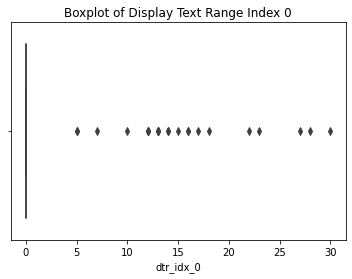

In [82]:
# Boxplot of Display Text Range Index 0
sns.boxplot(twitter_api_df['dtr_idx_0']);
plt.title('Boxplot of Display Text Range Index 0');

In [83]:
# display_text_range that starts in more than 0
twitter_api_df[twitter_api_df['dtr_idx_0'] > 0]

id  favorite_count  retweet_count  retweeted  \
29    886267009285017600  117             4              False       
54    881633300179243008  129             7              False       
63    879674319642796034  315             10             False       
112   870726314365509632  121             3              False       
147   863427515083354112  2363            105            False       
178   857214891891077121  242             20             False       
185   856288084350160898  545             17             False       
187   855862651834028034  320             27             False       
188   855860136149123072  4407            1058           False       
217   850333567704068097  3647            367            False       
233   847617282490613760  7558            468            False       
273   840698636975636481  197             3              False       
289   838150277551247360  1824            370            False       
290   838085839343206401  150             0              False       
312   835246439529840640  2259            83             False       
341   832088576586297345  72              3              False       
345   831926988323639298  369             39             False       
408   823333489516937216  777             31             False       
426   821153421864615936  280             10             False       
575   800859414831898624  778             113            False       
610   797165961484890113  256             32             False       
855   763956972077010945  812             61             False       
1078  738891149612572673  115             6              False       

     display_text_range  dtr_idx_0  dtr_idx_1  
29    [27, 105]          27         105        
54    [13, 91]           13         91         
63    [16, 31]           16         31         
112   [30, 60]           30         60         
147   [17, 134]          17         134        
178   [10, 28]           10         28         
185   [28, 165]          28         165        
187   [14, 86]           14         86         
188   [5, 133]           5          133        
217   [12, 136]          12         136        
233   [18, 79]           18         79         
273   [12, 56]           12         56         
289   [12, 18]           12         18         
290   [23, 63]           23         63         
312   [22, 98]           22         98         
341   [13, 40]           13         40         
345   [5, 22]            5          22         
408   [15, 20]           15         20         
426   [7, 56]            7          56         
575   [13, 105]          13         105        
610   [16, 55]           16         55         
855   [14, 81]           14         81         
1078  [13, 18]           13         18

In [84]:
# Example Text of tweet_id 886267009285017600
twitter_archive[twitter_archive.tweet_id == 886267009285017600]['text'].values[0]

'@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution'

In [85]:
# Index 0 that don't have 0 value indicates that the text is retweeted kind of tweet
len('@NonWhiteHat @MayhewMayhem ')

27

In [86]:
# Row and columns of twitter_api dataset
twitter_api_df.shape

(2354, 7)

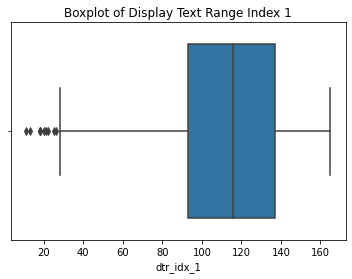

In [87]:
# Boxplot of Display Text Range Index 1
sns.boxplot(twitter_api_df['dtr_idx_1']);
plt.title('Boxplot of Display Text Range Index 1');

### Quality
1. Some display_text_range variable start at more than zero.

### Tidiness
1. The dataset should be merged with the previous dataset.
2. The dataset twitter_api_df has 2,354 observation which is different from the twitter_archive dataset.

## Cleaning Data
By using Pandas Library, the cleaning process consists of Define, Coding and Testing.

### 1. Cleaning Data: twitter_archive

In [88]:
# Create a copy of twitter archive dataset
twitter_archive_clean = twitter_archive.copy()

In [89]:
# Display sample of twitter archive
twitter_archive_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2089  670789397210615808 NaN                    NaN                    
1284  708479650088034305 NaN                    NaN                    
929   754482103782404096 NaN                    NaN                    
1368  702539513671897089 NaN                    NaN                    
1233  712809025985978368 NaN                    NaN                    

                      timestamp  \
2089  2015-11-29 02:20:29 +0000   
1284  2016-03-12 02:28:06 +0000   
929   2016-07-17 01:05:25 +0000   
1368  2016-02-24 17:04:07 +0000   
1233  2016-03-24 01:11:29 +0000   

                                                                                  source  \
2089  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1284  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
929   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1368  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1233  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                             text  \
2089  Two obedient dogs here. Left one has extra leg sticking out of its back. They each get 9/10. Would pet both at once https://t.co/RGcNPsmAfY   
1284  Meet Bear. He's a Beneboop Cumberclap. Extremely unamused. 13/10 I'm in love with this picture https://t.co/uC8kUqAz0W                        
929   This is Milo. He's currently plotting his revenge. 10/10 https://t.co/ca0q9HM8II                                                              
1368  This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6      
1233  This is Stubert. He just arrived. 10/10 https://t.co/HVGs5aAKAn                                                                               

      retweeted_status_id  retweeted_status_user_id  \
2089 NaN                  NaN                         
1284 NaN                  NaN                         
929  NaN                  NaN                         
1368 NaN                  NaN                         
1233 NaN                  NaN                         

     retweeted_status_timestamp  \
2089  NaN                         
1284  NaN                         
929   NaN                         
1368  NaN                         
1233  NaN                         

                                                                                                                                                                                        expanded_urls  \
2089  https://twitter.com/dog_rates/status/670789397210615808/photo/1                                                                                                                                   
1284  https://twitter.com/dog_rates/status/708479650088034305/photo/1                                                                                                                                   
929   https://twitter.com/dog_rates/status/754482103782404096/video/1                                                                                                                                   
1368  https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1   
1233  https://twitter.com/dog_rates/status/712809025985978368/photo/1                                                                                                                                   

      rating_numerator  rating_denominator     name doggo floofer pupper  \
2089  9                 10                  None     None  None    None    
1284  13               

#### Define:
- Remove missing values in columns
- Change timestamp object data type to datetime
- Change rating_numerator of 0 with 0 value in rating_numerator_new
- Change all rating_denominator value to 10
- Change inaccurate rating_numerator
- Create new variable of all dog categories
- Rename unusual or invalid data of dog names
- Extract the attribute inside HTML in source variable
- Impute the expand_urls to the consistent value

#### Code:

In [90]:
# Checking for null values
twitter_archive_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
total_category                0   
dtype: int64

In [91]:
# Only include the column that is useful to be analyzed
twitter_archive_clean = twitter_archive_clean[['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]
twitter_archive_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0  13                10                  Phineas   None  None    None   None  
1  13                10                  Tilly     None  None    None   None  
2  12                10                  Archie    None  None    None   None  
3  13                10                  Darla     None  None    None   None  
4  12                10                  Franklin  None  None    None   None

In [92]:
# Change timestamp data type to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [93]:
# Extract HTML content
temp_ = []
for i in twitter_archive_clean['source']:
    temp_.append(re.findall(r'>(.*?)<', i)[0])
twitter_archive_clean['source_twitter'] = temp_

In [94]:
# Delete 'source' columns
twitter_archive_clean.drop(columns='source', inplace=True)

In [95]:
# Display first 5 rows
twitter_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  \
0  13                10                  Phineas   None  None    None   None   
1  13                10                  Tilly     None  None    None   None   
2  12                10                  Archie    None  None    None   None   
3  13                10                  Darla     None  None    None   None   
4  12                10                  Franklin  None  None    None   None   

       source_twitter  
0  Twitter for iPhone  
1  Twitter for iPhone  
2  Twitter for iPhone  
3  Twitter for iPhone  
4  Twitter for iPhone

In [96]:
# Extract Numerator Rating from text variable
temp_2 = []

for i in twitter_archive_clean['text']:
    temp_2.append(re.findall(r'\d+\.?\d+\/\d+', i))

# temp_2

In [97]:
# Create new rating_numerator and new rating denominator
# by extracting integer/float rating from text variable
rating_numerator_new = []
rating_denominator_new = []
for i in temp_2:
    if len(i) == 0:
        rating_numerator_new.append(0)
        rating_denominator_new.append(0)
    elif len(i) == 1:
        x1 = float(i[0].split('/')[0])
        x2 = float(i[0].split('/')[1])
        if x1 == 24 and x2 == 7:
            rating_numerator_new.append(0)
            rating_denominator_new.append(0)
        elif x2 == 10:
            rating_numerator_new.append(x1)
            rating_denominator_new.append(x2)
        elif x2 != 10:
            temp = x2/10
            if x1 == 0:
                rating_numerator_new.append(0)
            else:
                rating_numerator_new.append(x1/temp)
            rating_denominator_new.append(10)
    else:
        x1 = float(i[-1].split('/')[0])
        x2 = float(i[-1].split('/')[1])
        rating_numerator_new.append(x1)
        rating_denominator_new.append(x2)

In [98]:
# Store new rating numerator and denominator to new variable
twitter_archive_clean['rating_numerator_new'] =  rating_numerator_new
twitter_archive_clean['rating_denominator_new'] =  rating_denominator_new

# Create rating variable by dividing rating_numerator_new to rating_denominator_new
twitter_archive_clean['rating'] =  twitter_archive_clean['rating_numerator_new']/twitter_archive_clean['rating_denominator_new']

In [99]:
# Checking the new columns of twitter_archive_clean
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'source_twitter', 'rating_numerator_new', 'rating_denominator_new',
       'rating'],
      dtype='object')

In [100]:
# Displaying the first 5 rows
twitter_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  \
0  13                10                  Phineas   None  None    None   None   
1  13                10                  Tilly     None  None    None   None   
2  12                10                  Archie    None  None    None   None   
3  13                10                  Darla     None  None    None   None   
4  12                10                  Franklin  None  None    None   None   

       source_twitter  rating_numerator_new  rating_denominator_new  rating  
0  Twitter for iPhone  13.0                  10.0                    1.3     
1  Twitter for iPhone  13.0                  10.0                    1.3     
2  Twitter for iPhone  12.0                  10.0                    1.2     
3  Twitter for iPhone  13.0                  10.0                    1.3     
4  Twitter for iPhone  12.0                  10.0                    1.2

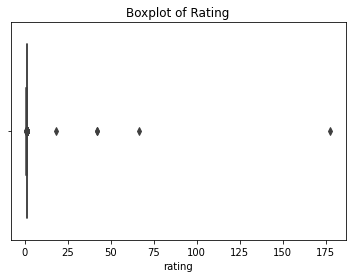

In [101]:
# Boxplot of rating
sns.boxplot(twitter_archive_clean['rating'])
plt.title('Boxplot of Rating');

In [102]:
# Description of center of rating variable
twitter_archive_clean['rating'].describe()

count    1926.000000
mean     1.327615   
std      4.501718   
min      0.700000   
25%      1.100000   
50%      1.200000   
75%      1.200000   
max      177.600000 
Name: rating, dtype: float64

In [103]:
# After checking the description of center position, the number 1.5 is choosen as the minimum value expected of rating
# Checking the rating which has more than 1.5 value
twitter_archive_clean[twitter_archive_clean['rating'] > 1.5][['tweet_id', 'text', 'rating_numerator_new', 'rating_denominator_new', 'rating']]

tweet_id  \
188   855862651834028034   
189   855860136149123072   
290   838150277551247360   
979   749981277374128128   
2074  670842764863651840   

                                                                                                                                       text  \
188   @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                  
189   @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
290   @markhoppus 182/10                                                                                                                      
979   This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                          
2074  After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY                                                     

      rating_numerator_new  rating_denominator_new  rating  
188   420.0                 10.0                    42.0    
189   666.0                 10.0                    66.6    
290   182.0                 10.0                    18.2    
979   1776.0                10.0                    177.6   
2074  420.0                 10.0                    42.0

In [104]:
# Total incorrect value of rating
len(twitter_archive_clean[twitter_archive_clean['rating'] > 1.5][['tweet_id', 'text', 'rating_numerator_new', 'rating_denominator_new', 'rating']])

5

Because the total of the inaccurate value of rating_numerator_new and rating_denominator_new above is only 5 observations, the cleaning will be conducted by imputing those value with median value.

In [105]:
# Imputing the incorrect value by median value
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 855862651834028034, 'rating_numerator_new'] = np.median(twitter_archive_clean['rating_numerator_new'])
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 855860136149123072, 'rating_numerator_new'] = np.median(twitter_archive_clean['rating_numerator_new'])
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 838150277551247360, 'rating_numerator_new'] = np.median(twitter_archive_clean['rating_numerator_new'])
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 749981277374128128, 'rating_numerator_new'] = np.median(twitter_archive_clean['rating_numerator_new'])
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 670842764863651840, 'rating_numerator_new'] = np.median(twitter_archive_clean['rating_numerator_new'])

In [106]:
# Updating the rating variable
twitter_archive_clean['rating'] =  twitter_archive_clean['rating_numerator_new']/twitter_archive_clean['rating_denominator_new']

In [107]:
# New description of rating 
twitter_archive_clean['rating'].describe()

count    1926.000000
mean     1.150616   
std      0.114733   
min      0.700000   
25%      1.100000   
50%      1.200000   
75%      1.200000   
max      1.500000   
Name: rating, dtype: float64

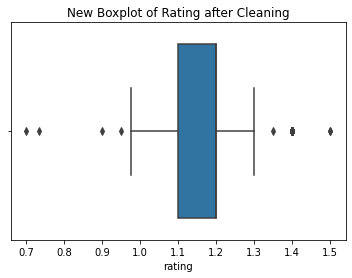

In [108]:
# New Boxplot of Rating after Cleaning
sns.boxplot(twitter_archive_clean['rating']);
plt.title('New Boxplot of Rating after Cleaning');

In [109]:
# Creating new categories of dog variables
# Merging 4 columns of doggo, floofer, puppper, puppo into one categories variable
categories = []
for idx, col in twitter_archive.iterrows():
    for cat in ['puppo', 'pupper', 'doggo', 'floofer']:
        if cat.lower() in str(twitter_archive_clean.loc[idx, 'text']).lower():
            twitter_archive_clean.loc[idx, 'categories'] = cat.title()

In [110]:
# Checking the expanded_urls column which has Null Value
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

tweet_id                 timestamp  \
30    886267009285017600 2017-07-15 16:51:35+00:00   
55    881633300179243008 2017-07-02 21:58:53+00:00   
64    879674319642796034 2017-06-27 12:14:36+00:00   
113   870726314365509632 2017-06-02 19:38:25+00:00   
148   863427515083354112 2017-05-13 16:15:35+00:00   
179   857214891891077121 2017-04-26 12:48:51+00:00   
185   856330835276025856 2017-04-24 02:15:55+00:00   
186   856288084350160898 2017-04-23 23:26:03+00:00   
188   855862651834028034 2017-04-22 19:15:32+00:00   
189   855860136149123072 2017-04-22 19:05:32+00:00   
218   850333567704068097 2017-04-07 13:04:55+00:00   
228   848213670039564288 2017-04-01 16:41:12+00:00   
234   847617282490613760 2017-03-31 01:11:22+00:00   
274   840698636975636481 2017-03-11 22:59:09+00:00   
290   838150277551247360 2017-03-04 22:12:52+00:00   
291   838085839343206401 2017-03-04 17:56:49+00:00   
313   835246439529840640 2017-02-24 21:54:03+00:00   
342   832088576586297345 2017-02-16 04:45:50+00:00   
346   831926988323639298 2017-02-15 18:03:45+00:00   
375   828361771580813312 2017-02-05 21:56:51+00:00   
387   826598799820865537 2017-02-01 01:11:25+00:00   
409   823333489516937216 2017-01-23 00:56:15+00:00   
427   821153421864615936 2017-01-17 00:33:26+00:00   
498   813130366689148928 2016-12-25 21:12:41+00:00   
513   811647686436880384 2016-12-21 19:01:02+00:00   
570   801854953262350336 2016-11-24 18:28:13+00:00   
576   800859414831898624 2016-11-22 00:32:18+00:00   
611   797165961484890113 2016-11-11 19:55:50+00:00   
701   786051337297522688 2016-10-12 03:50:17+00:00   
707   785515384317313025 2016-10-10 16:20:36+00:00   
843   766714921925144576 2016-08-19 19:14:16+00:00   
857   763956972077010945 2016-08-12 04:35:10+00:00   
967   750381685133418496 2016-07-05 17:31:49+00:00   
1005  747651430853525504 2016-06-28 04:42:46+00:00   
1080  738891149612572673 2016-06-04 00:32:32+00:00   
1295  707983188426153984 2016-03-10 17:35:20+00:00   
1345  704491224099647488 2016-03-01 02:19:31+00:00   
1445  696518437233913856 2016-02-08 02:18:30+00:00   
1446  696490539101908992 2016-02-08 00:27:39+00:00   
1474  693644216740769793 2016-01-31 03:57:23+00:00   
1479  693582294167244802 2016-01-30 23:51:19+00:00   
1497  692423280028966913 2016-01-27 19:05:49+00:00   
1523  690607260360429569 2016-01-22 18:49:36+00:00   
1598  686035780142297088 2016-01-10 04:04:10+00:00   
1605  685681090388975616 2016-01-09 04:34:45+00:00   
1618  684969860808454144 2016-01-07 05:28:35+00:00   
1663  682808988178739200 2016-01-01 06:22:03+00:00   
1689  681340665377193984 2015-12-28 05:07:27+00:00   
1774  678023323247357953 2015-12-19 01:25:31+00:00   
1819  676590572941893632 2015-12-15 02:32:17+00:00   
1844  675849018447167488 2015-12-13 01:25:37+00:00   
1895  674742531037511680 2015-12-10 00:08:50+00:00   
1905  674606911342424069 2015-12-09 15:09:55+00:00   
1914  674330906434379776 2015-12-08 20:53:11+00:00   
1940  673716320723169284 2015-12-07 04:11:02+00:00   
2038  671550332464455680 2015-12-01 04:44:10+00:00   
2149  669684865554620416 2015-11-26 01:11:28+00:00   
2189  668967877119254528 2015-11-24 01:42:25+00:00   
2298  667070482143944705 2015-11-18 20:02:51+00:00   

                                                                                                                                                                       text  \
30    @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution                                                               
55    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                             
64    @RealKentMurphy 14/10 confirmed                                                                                                                                         
113   @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs         

In [111]:
# Imputing the null value in expanded_urls variable
for idx, col in twitter_archive_clean.iterrows():
    if twitter_archive_clean['expanded_urls'].isnull()[idx]:
        twitter_archive_clean.loc[idx, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(twitter_archive_clean['tweet_id'][idx])

In [112]:
# Checking columns of clean dataset
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'source_twitter', 'rating_numerator_new', 'rating_denominator_new',
       'rating', 'categories'],
      dtype='object')

In [113]:
# Choosing the columns that will be useful for the further analysis
twitter_archive_clean_df = twitter_archive_clean[['tweet_id', 'timestamp', 'text', 'expanded_urls', 'name','source_twitter', 'rating_numerator_new', 'rating_denominator_new', 'rating', 'categories']]
twitter_archive_clean_df.columns = ['tweet_id', 'timestamp', 'text', 'expanded_urls', 'name', 'source_twitter', 'rating_numerator', 'rating_denominator', 'rating', 'categories']
twitter_archive_clean_df.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name      source_twitter  rating_numerator  rating_denominator  rating  \
0  Phineas   Twitter for iPhone  13.0              10.0                1.3      
1  Tilly     Twitter for iPhone  13.0              10.0                1.3      
2  Archie    Twitter for iPhone  12.0              10.0                1.2      
3  Darla     Twitter for iPhone  13.0              10.0                1.3      
4  Franklin  Twitter for iPhone  12.0              10.0                1.2      

  categories  
0  NaN        
1  NaN        
2  NaN        
3  NaN        
4  NaN

In [114]:
# Checking name variable which has 'None' value
twitter_archive_clean_df[twitter_archive_clean_df.name == 'None'].sample(5)

tweet_id                 timestamp  \
868   761750502866649088 2016-08-06 02:27:27+00:00   
436   820314633777061888 2017-01-14 17:00:24+00:00   
1279  708845821941387268 2016-03-13 02:43:08+00:00   
1901  674646392044941312 2015-12-09 17:46:48+00:00   
1892  674754018082705410 2015-12-10 00:54:28+00:00   

                                                                                                                                                                      text  \
868   RT @dog_rates: "Tristan do not speak to me with that kind of tone or I will take away the Xbox." 10/10 https://t.co/VGPH0TfESw                                         
436   We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE   
1279  Here's a pupper with magic eyes. Not wearing a seat belt tho (irresponsible af). Very distracting to driver. 9/10 https://t.co/5DLJB4ssvI                              
1901  Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD                          
1892  Just received another perfect photo of dogs and the sunset. 12/10 https://t.co/9YmNcxA2Cc                                                                              

                                                                                                                                                                                                                                     expanded_urls  \
868   https://twitter.com/dog_rates/status/685325112850124800/photo/1,https://twitter.com/dog_rates/status/685325112850124800/photo/1                                                                                                                
436   https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1   
1279  https://twitter.com/dog_rates/status/708845821941387268/photo/1,https://twitter.com/dog_rates/status/708845821941387268/photo/1                                                                                                                
1901  https://twitter.com/dog_rates/status/674646392044941312/photo/1                                                                                                                                                                                
1892  https://twitter.com/dog_rates/status/674754018082705410/photo/1                                                                                                                                                                                

      name      source_twitter  rating_numerator  rating_denominator  rating  \
868   None  Twitter for iPhone  10.0              10.0                1.0      
436   None  Twitter for iPhone  14.0              10.0                1.4      
1279  None  Twitter for iPhone  0.0               0.0                NaN       
1901  None  Twitter for iPhone  0.0               0.0                NaN       
1892  None  Twitter for iPhone  12.0              10.0                1.2      

     categories  
868   NaN        
436   NaN        
1279  Pupper     
1901  NaN        
1892  NaN

In [115]:
# Sorting the name variable
sorted(twitter_archive_clean_df.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [116]:
# Count the name variable per value
twitter_archive_clean_df['name'].value_counts()

None              745
a                 55 
Charlie           12 
Oliver            11 
Lucy              11 
Cooper            11 
Penny             10 
Lola              10 
Tucker            10 
Winston           9  
Bo                9  
Sadie             8  
the               8  
Daisy             7  
Bailey            7  
Buddy             7  
Toby              7  
an                7  
Leo               6  
Koda              6  
Scout             6  
Milo              6  
Jax               6  
Bella             6  
Stanley           6  
Dave              6  
Rusty             6  
Jack              6  
Oscar             6  
Oakley            5  
Sammy             5  
Louis             5  
very              5  
Bentley           5  
Gus               5  
Larry             5  
Finn              5  
Sunny             5  
Alfie             5  
George            5  
Chester           5  
Phil              5  
Winnie            4  
Walter            4  
Clark             4  
Maximus   

In [117]:
# Create new variables of 
unusual_names = ['a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very', 
 'None']

In [118]:
# Imputing the unusual names in name variable
for idx, col in twitter_archive_clean_df.iterrows():
    if twitter_archive_clean_df['name'][idx] in unusual_names:
        twitter_archive_clean_df.loc[idx, 'name'] = np.nan        

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Testing:

In [119]:
# Timestamp Data Type has changed to datetime
# Unused Columns have been deleted
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   expanded_urls       2356 non-null   object             
 4   name                1502 non-null   object             
 5   source_twitter      2356 non-null   object             
 6   rating_numerator    2356 non-null   float64            
 7   rating_denominator  2356 non-null   float64            
 8   rating              1926 non-null   float64            
 9   categories          423 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 184.2+ KB


In [120]:
# Display the first 5 rows after cleaning
twitter_archive_clean_df.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name      source_twitter  rating_numerator  rating_denominator  rating  \
0  Phineas   Twitter for iPhone  13.0              10.0                1.3      
1  Tilly     Twitter for iPhone  13.0              10.0                1.3      
2  Archie    Twitter for iPhone  12.0              10.0                1.2      
3  Darla     Twitter for iPhone  13.0              10.0                1.3      
4  Franklin  Twitter for iPhone  12.0              10.0                1.2      

  categories  
0  NaN        
1  NaN        
2  NaN        
3  NaN        
4  NaN

In [121]:
# Checking name value counts
twitter_archive_clean_df.name.value_counts()

Charlie           12
Oliver            11
Cooper            11
Lucy              11
Penny             10
Lola              10
Tucker            10
Winston           9 
Bo                9 
Sadie             8 
Bailey            7 
Daisy             7 
Buddy             7 
Toby              7 
Dave              6 
Jack              6 
Leo               6 
Bella             6 
Oscar             6 
Milo              6 
Rusty             6 
Stanley           6 
Koda              6 
Scout             6 
Jax               6 
Oakley            5 
Larry             5 
Chester           5 
Phil              5 
Sammy             5 
Alfie             5 
Sunny             5 
Louis             5 
Bentley           5 
Finn              5 
George            5 
Gus               5 
Maddie            4 
Reginald          4 
Gary              4 
Shadow            4 
Bear              4 
Gerald            4 
Reggie            4 
Carl              4 
Clarence          4 
Maggie            4 
Sophie       

### 2. Cleaning Data: tweet_image_prediction

<b>Define:</b>
1. Changing the case format of predictiond breed of dogs
2. Removing Duplicated values of jpg_url
3. Changing the name of variables into clear name
4. Merging the tweet_image_prediction dataset with twitter_archive_clean_df dataset

In [122]:
# Copy tweet image prediction to new variable
tweet_image_prediction_clean = tweet_image_prediction.copy()

In [123]:
# Display the first 5 rows of tweet_image_prediction_clean
tweet_image_prediction_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0  1        Welsh_springer_spaniel  0.465074  True    collie               
1  1        redbone                 0.506826  True    miniature_pinscher   
2  1        German_shepherd         0.596461  True    malinois             
3  1        Rhodesian_ridgeback     0.408143  True    redbone              
4  1        miniature_pinscher      0.560311  True    Rottweiler           

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665  True    Shetland_sheepdog    0.061428  True    
1  0.074192  True    Rhodesian_ridgeback  0.072010  True    
2  0.138584  True    bloodhound           0.116197  True    
3  0.360687  True    miniature_pinscher   0.222752  True    
4  0.243682  True    Doberman             0.154629  True

In [124]:
# Checking for null value
tweet_image_prediction_clean.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [125]:
# Checking the duplicated value of jpg_url variable
tweet_image_prediction_clean['jpg_url'].duplicated().sum()

66

In [126]:
# Check observations with duplicated jpg_url
tweet_image_prediction_clean[tweet_image_prediction_clean['jpg_url'].duplicated()]

tweet_id  \
1297  752309394570878976   
1315  754874841593970688   
1333  757729163776290825   
1345  759159934323924993   
1349  759566828574212096   
1364  761371037149827077   
1368  761750502866649088   
1387  766078092750233600   
1407  770093767776997377   
1417  771171053431250945   
1427  772615324260794368   
1446  775898661951791106   
1453  776819012571455488   
1456  777641927919427584   
1463  778396591732486144   
1476  780496263422808064   
1487  782021823840026624   
1495  783347506784731136   
1510  786036967502913536   
1522  788070120937619456   
1538  790723298204217344   
1541  791026214425268224   
1564  793614319594401792   
1569  794355576146903043   
1571  794983741416415232   
1579  796177847564038144   
1588  798340744599797760   
1589  798628517273620480   
1590  798644042770751489   
1591  798665375516884993   
1592  798673117451325440   
1593  798694562394996736   
1594  798697898615730177   
1601  799774291445383169   
1605  800443802682937345   
1615  802247111496568832   
1619  802624713319034886   
1624  803692223237865472   
1627  804413760345620481   
1634  805958939288408065   
1636  806242860592926720   
1640  807059379405148160   
1645  808134635716833280   
1652  809808892968534016   
1683  813944609378369540   
1693  816014286006976512   
1699  816829038950027264   
1703  817181837579653120   
1712  818588835076603904   
1717  819015331746349057   
1718  819015337530290176   
1727  820446719150292993   
1736  821813639212650496   
1742  822647212903690241   
1746  823269594223824897   
1755  824796380199809024   
1789  829878982036299777   
1803  832040443403784192   
1804  832215726631055365   
1858  841833993020538882   
1864  842892208864923648   
1903  851953902622658560   
1944  861769973181624320   
1992  873697596434513921   
2041  885311592912609280   
2055  888202515573088257   

                                                                                      jpg_url  \
1297  https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg   
1315  https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                           
1333  https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg                                           
1345  https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                           
1349  https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                           
1364  https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                               
1368  https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                           
1387  https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                           
1407  https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                           
1417  https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                           
1427  https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                           
1446  https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                           
1453  https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                           
1456  https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                           
1463  https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                           
1476  https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                           
1487  https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                           
1495  https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                           
1510  https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                           
1522  https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                           
1538  https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                           
1541 

In [127]:
# Check observation with duplicated jpg_url
tweet_image_prediction_clean[tweet_image_prediction_clean['jpg_url'] == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

tweet_id                                          jpg_url  \
591   679158373988876288  https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1315  754874841593970688  https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   

      img_num   p1   p1_conf  p1_dog            p2  p2_conf  p2_dog  \
591   1        pug  0.272205  True    bull_mastiff  0.25153  True     
1315  1        pug  0.272205  True    bull_mastiff  0.25153  True     

              p3   p3_conf  p3_dog  
591   bath_towel  0.116806  False   
1315  bath_towel  0.116806  False

In [128]:
# Checking columns in tweet_image_prediction_clean
tweet_image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [129]:
# Check unique value of img_num variable
tweet_image_prediction_clean['img_num'].unique()

array([1, 4, 2, 3])

<b>Coding:</b>

In [130]:
# Update new variable name
tweet_image_prediction_clean.columns = ['tweet_id', 'jpg_url', 'image_number', 
                                  'prediction_1', 'prediction_1_confidence', 'prediction_1_dog', 
                                  'prediction_2', 'prediction_2_confidence', 'prediction_2_dog', 
                                  'prediction_3', 'prediction_3_confidence', 'prediction_3_dog']

In [131]:
# Make clear and conistent name by changing first character of every word to upper case
for idx, col in tweet_image_prediction_clean.iterrows():
    tweet_image_prediction_clean.loc[idx, 'prediction_1'] = ' '.join(tweet_image_prediction_clean['prediction_1'][idx].split('_')).title()
    tweet_image_prediction_clean.loc[idx, 'prediction_2'] = ' '.join(tweet_image_prediction_clean['prediction_2'][idx].split('_')).title()
    tweet_image_prediction_clean.loc[idx, 'prediction_3'] = ' '.join(tweet_image_prediction_clean['prediction_3'][idx].split('_')).title()  

In [132]:
# Check the total of observation of twitter_archive_clean_df
len(twitter_archive_clean_df)

2356

In [133]:
# Merging twitter_archive_clean_df with tweet_image_prediction_clean
twitter_archive_image_pred_clean = twitter_archive_clean_df.merge(tweet_image_prediction_clean, left_on='tweet_id', right_on='tweet_id', how='outer')
twitter_archive_image_pred_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name      source_twitter  rating_numerator  rating_denominator  rating  \
0  Phineas   Twitter for iPhone  13.0              10.0                1.3      
1  Tilly     Twitter for iPhone  13.0              10.0                1.3      
2  Archie    Twitter for iPhone  12.0              10.0                1.2      
3  Darla     Twitter for iPhone  13.0              10.0                1.3      
4  Franklin  Twitter for iPhone  12.0              10.0                1.2      

  categories                                          jpg_url  image_number  \
0  NaN        https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  1.0            
1  NaN        https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1.0            
2  NaN        https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1.0            
3  NaN        https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  1.0            
4  NaN        https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2.0            

  prediction_1  prediction_1_confidence prediction_1_dog        prediction_2  \
0  Orange       0.097049                 False            Bagel                
1  Chihuahua    0.323581                 True             Pekinese             
2  Chihuahua    0.716012                 True             Malamute             
3  Paper Towel  0.170278                 False            Labrador Retriever   
4  Basset       0.555712                 True             English Springer     

   prediction_2_confidence prediction_2_dog                 prediction_3  \
0  0.085851                 False            Banana                        
1  0.090647                 True             Papillon                      
2  0.078253                 True             Kelpie                        
3  0.168086                 True             Spatula                       
4  0.225770                 True             German Short-Haire

In [134]:
# Check observation with duplicated jpg_url
twitter_archive_image_pred_clean[twitter_archive_image_pred_clean['jpg_url'] == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

tweet_id                 timestamp  \
926   754874841593970688 2016-07-18 03:06:01+00:00   
1744  679158373988876288 2015-12-22 04:35:49+00:00   

                                                                                   text  \
926   RT @dog_rates: This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag   
1744  This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag                  

                                                                                                                        expanded_urls  \
926   https://twitter.com/dog_rates/status/679158373988876288/photo/1,https://twitter.com/dog_rates/status/679158373988876288/photo/1   
1744  https://twitter.com/dog_rates/status/679158373988876288/photo/1                                                                   

       name      source_twitter  rating_numerator  rating_denominator  rating  \
926   Rubio  Twitter for iPhone  11.0              10.0                1.1      
1744  Rubio  Twitter for iPhone  11.0              10.0                1.1      

     categories                                          jpg_url  \
926   NaN        https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1744  NaN        https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   

      image_number prediction_1  prediction_1_confidence prediction_1_dog  \
926   1.0           Pug          0.272205                 True              
1744  1.0           Pug          0.272205                 True              

      prediction_2  prediction_2_confidence prediction_2_dog prediction_3  \
926   Bull Mastiff  0.25153                  True             Bath Towel    
1744  Bull Mastiff  0.25153                  True             Bath Towel    

      prediction_3_confidence prediction_3_dog  
926   0.116806                 False            
1744  0.116806                 False

In [135]:
# Drop value in jpg_url that has duplicated value
twitter_archive_image_pred_clean.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

In [136]:
# Check duplicated value in jpg_url variable
twitter_archive_image_pred_clean[twitter_archive_image_pred_clean['jpg_url'].duplicated() == True]

Empty DataFrame
Columns: [tweet_id, timestamp, text, expanded_urls, name, source_twitter, rating_numerator, rating_denominator, rating, categories, jpg_url, image_number, prediction_1, prediction_1_confidence, prediction_1_dog, prediction_2, prediction_2_confidence, prediction_2_dog, prediction_3, prediction_3_confidence, prediction_3_dog]
Index: []

In [137]:
# Check obervation that has duplicated value on jpg_url
twitter_archive_image_pred_clean[twitter_archive_image_pred_clean['jpg_url'] == 'https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg']

tweet_id                 timestamp  \
537  806629075125202948 2016-12-07 22:38:52+00:00   

                                                                                                              text  \
537  "Good afternoon class today we're going to learn what makes a good boy so good" 13/10 https://t.co/f1h2Fsalv9   

                                                                                                                       expanded_urls  \
537  https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1   

    name      source_twitter  rating_numerator  rating_denominator  rating  \
537  NaN  Twitter for iPhone  13.0              10.0                1.3      

    categories                                          jpg_url  image_number  \
537  NaN        https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg  2.0            

      prediction_1  prediction_1_confidence prediction_1_dog prediction_2  \
537  Arabian Camel  0.366248                 False            House Finch   

     prediction_2_confidence prediction_2_dog    prediction_3  \
537  0.209852                 False            Cocker Spaniel   

     prediction_3_confidence prediction_3_dog  
537  0.046403                 True

In [138]:
# Check 5 samples of twitter_archive_image_pred_clean
twitter_archive_image_pred_clean.sample(5)

tweet_id                 timestamp  \
1906  674468880899788800 2015-12-09 06:01:26+00:00   
1161  723912936180330496 2016-04-23 16:34:28+00:00   
1128  729823566028484608 2016-05-10 00:01:12+00:00   
60    880465832366813184 2017-06-29 16:39:47+00:00   
443   819347104292290561 2017-01-12 00:55:47+00:00   

                                                                                                                                                   text  \
1906  This is Louis. He thinks he's flying. 13/10 this is a legendary pup https://t.co/6d9WziPXmx                                                         
1161  This is Sugar. She's a Bolivian Superfloof. Spherical af. 12/10 would never let go of https://t.co/AhMfUu6Onm                                       
1128  This is Stefan. He's a downright remarkable pup. 13/10 https://t.co/Ebjt6Y4fMh                                                                      
60    This is Bella. She had her first beach experience this morning. Complete success. 12/10 would perform a sandy boop https://t.co/4VsFysDmiw          
443   Say hello to Anna and Elsa. They fall asleep in similar positions. It's pretty wild. Both 12/10 would snug simultaneously https://t.co/8rUL99bX4W   

                                                                                                                                                                                                                                                        expanded_urls  \
1906  https://twitter.com/dog_rates/status/674468880899788800/photo/1,https://twitter.com/dog_rates/status/674468880899788800/photo/1                                                                                                                                   
1161  https://twitter.com/dog_rates/status/723912936180330496/photo/1                                                                                                                                                                                                   
1128  https://twitter.com/dog_rates/status/729823566028484608/photo/1                                                                                                                                                                                                   
60    https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1   
443   https://twitter.com/dog_rates/status/819347104292290561/photo/1,https://twitter.com/dog_rates/status/819347104292290561/photo/1,https://twitter.com/dog_rates/status/819347104292290561/photo/1                                                                   

        name      source_twitter  rating_numerator  rating_denominator  \
1906  Louis   Twitter for iPhone  13.0              10.0                 
1161  Sugar   Twitter for iPhone  12.0              10.0                 
1128  Stefan  Twitter for iPhone  13.0              10.0                 
60    Bella   Twitter for iPhone  12.0              10.0                 
443   Anna    Twitter for iPhone  12.0              10.0                 

      rating categories                                          jpg_url  \
1906  1.3     NaN        https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg   
1161  1.2     NaN        https://pbs.twimg.com/media/Cgva-QqUUAA7Hv9.jpg   
1128  1.3     NaN        https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg   
60    1.2     NaN        https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg   
443   1.2     NaN        https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg   

      image_number      prediction_1  prediction_1_confidence  \
1906  2.0           Chow              0.526230                  
1161  1.0           Samoyed           0.991772                  
1128  1.0           Kelpie            0.218408                  
60    1

In [139]:
# Check jpg_url variable  that has null value
twitter_archive_image_pred_clean[twitter_archive_image_pred_clean.jpg_url.isnull()]

tweet_id                 timestamp  \
2298  667070482143944705 2015-11-18 20:02:51+00:00   

                                                                       text  \
2298  After much debate this dog is being upgraded to 10/10. I repeat 10/10   

                                                expanded_urls name  \
2298  https://twitter.com/dog_rates/status/667070482143944705  NaN   

          source_twitter  rating_numerator  rating_denominator  rating  \
2298  Twitter for iPhone  10.0              10.0                1.0      

     categories jpg_url  image_number prediction_1  prediction_1_confidence  \
2298  NaN        NaN    NaN            NaN         NaN                        

     prediction_1_dog prediction_2  prediction_2_confidence prediction_2_dog  \
2298  NaN              NaN         NaN                       NaN               

     prediction_3  prediction_3_confidence prediction_3_dog  
2298  NaN         NaN                       NaN

In [140]:
# Drop the row that has null value on jpg_url
twitter_archive_image_pred_clean.drop([2298], inplace=True)

<b>Testing:</b>

In [141]:
# Display the first 5 row on dataset
twitter_archive_image_pred_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name      source_twitter  rating_numerator  rating_denominator  rating  \
0  Phineas   Twitter for iPhone  13.0              10.0                1.3      
1  Tilly     Twitter for iPhone  13.0              10.0                1.3      
2  Archie    Twitter for iPhone  12.0              10.0                1.2      
3  Darla     Twitter for iPhone  13.0              10.0                1.3      
4  Franklin  Twitter for iPhone  12.0              10.0                1.2      

  categories                                          jpg_url  image_number  \
0  NaN        https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  1.0            
1  NaN        https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1.0            
2  NaN        https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1.0            
3  NaN        https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  1.0            
4  NaN        https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2.0            

  prediction_1  prediction_1_confidence prediction_1_dog        prediction_2  \
0  Orange       0.097049                 False            Bagel                
1  Chihuahua    0.323581                 True             Pekinese             
2  Chihuahua    0.716012                 True             Malamute             
3  Paper Towel  0.170278                 False            Labrador Retriever   
4  Basset       0.555712                 True             English Springer     

   prediction_2_confidence prediction_2_dog                 prediction_3  \
0  0.085851                 False            Banana                        
1  0.090647                 True             Papillon                      
2  0.078253                 True             Kelpie                        
3  0.168086                 True             Spatula                       
4  0.225770                 True             German Short-Haire

In [142]:
# Check total row and columns on dataset
twitter_archive_image_pred_clean.shape

(2009, 21)

In [143]:
# Check jpg_url variable  that has null value
twitter_archive_image_pred_clean[twitter_archive_image_pred_clean.jpg_url.isnull()]

Empty DataFrame
Columns: [tweet_id, timestamp, text, expanded_urls, name, source_twitter, rating_numerator, rating_denominator, rating, categories, jpg_url, image_number, prediction_1, prediction_1_confidence, prediction_1_dog, prediction_2, prediction_2_confidence, prediction_2_dog, prediction_3, prediction_3_confidence, prediction_3_dog]
Index: []

### 3. Cleaning Data: twitter_api_df
#### Define:
1. Checking the start display_text_range variable why some observation didn't start at 0
2. Merging the twitter_api_df with twitter_archive_image_pred_clean
3. Creating new dog prediction and its confidence prediction variable with True Prediction
4. Clean the expanded_urls variable with only the link that generated by twitter
5. Store the clean dataset to .csv

In [144]:
# Copy the twitter_api_df to new variable of twitter_api_df_clean
twitter_api_df_clean = twitter_api_df.copy()

In [145]:
# Display first 5 rows of dataset
twitter_api_df_clean.head()

id  favorite_count  retweet_count  retweeted  \
0  892420643555336193  39467           8853           False       
1  892177421306343426  33819           6514           False       
2  891815181378084864  25461           4328           False       
3  891689557279858688  42908           8964           False       
4  891327558926688256  41048           9774           False       

  display_text_range  dtr_idx_0  dtr_idx_1  
0  [0, 85]            0          85         
1  [0, 138]           0          138        
2  [0, 121]           0          121        
3  [0, 79]            0          79         
4  [0, 138]           0          138

In [146]:
# Check the null value of twitter_api_df_clean dataset
twitter_api_df_clean.isnull().sum()

id                    0
favorite_count        0
retweet_count         0
retweeted             0
display_text_range    0
dtr_idx_0             0
dtr_idx_1             0
dtype: int64

#### Coding:

In [147]:
# Merging twitter_archive_clean_df with tweet_image_prediction_clean
twitter_archive_image_pred_api_clean = twitter_archive_image_pred_clean.merge(twitter_api_df_clean, left_on='tweet_id', right_on='id', how='outer')
twitter_archive_image_pred_api_clean.head()

tweet_id                 timestamp  \
0  8.924206e+17 2017-08-01 16:23:56+00:00   
1  8.921774e+17 2017-08-01 00:17:27+00:00   
2  8.918152e+17 2017-07-31 00:18:03+00:00   
3  8.916896e+17 2017-07-30 15:58:51+00:00   
4  8.913276e+17 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name      source_twitter  rating_numerator  rating_denominator  rating  \
0  Phineas   Twitter for iPhone  13.0              10.0                1.3      
1  Tilly     Twitter for iPhone  13.0              10.0                1.3      
2  Archie    Twitter for iPhone  12.0              10.0                1.2      
3  Darla     Twitter for iPhone  13.0              10.0                1.3      
4  Franklin  Twitter for iPhone  12.0              10.0                1.2      

  categories                                          jpg_url  image_number  \
0  NaN        https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  1.0            
1  NaN        https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1.0            
2  NaN        https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1.0            
3  NaN        https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  1.0            
4  NaN        https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2.0            

  prediction_1  prediction_1_confidence prediction_1_dog        prediction_2  \
0  Orange       0.097049                 False            Bagel                
1  Chihuahua    0.323581                 True             Pekinese             
2  Chihuahua    0.716012                 True             Malamute             
3  Paper Towel  0.170278                 False            Labrador Retriever   
4  Basset       0.555712                 True             English Springer     

   prediction_2_confidence prediction_2_dog                 prediction_3  \
0  0.085851                 False            Banana                        
1  0.090647                 True             Papillon                      
2  0.078253                 True             Kelpie                        
3  0.168086                 True             Spatula                       
4  0.225770                 True             German Short-Haired Pointer   

   prediction_3_

In [148]:
# Total row x columns of twitter_archive_image_pred_api_clean
twitter_archive_image_pred_api_clean.shape

(2355, 28)

In [149]:
# Checking the data types and null values for each variables
twitter_archive_image_pred_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 2009 non-null   float64            
 1   timestamp                2009 non-null   datetime64[ns, UTC]
 2   text                     2009 non-null   object             
 3   expanded_urls            2009 non-null   object             
 4   name                     1350 non-null   object             
 5   source_twitter           2009 non-null   object             
 6   rating_numerator         2009 non-null   float64            
 7   rating_denominator       2009 non-null   float64            
 8   rating                   1600 non-null   float64            
 9   categories               346 non-null    object             
 10  jpg_url                  2009 non-null   object             
 11  image_number             2009 

In [150]:
# Checking the null values of every variables
twitter_archive_image_pred_api_clean.isnull().sum()

tweet_id                   346 
timestamp                  346 
text                       346 
expanded_urls              346 
name                       1005
source_twitter             346 
rating_numerator           346 
rating_denominator         346 
rating                     755 
categories                 2009
jpg_url                    346 
image_number               346 
prediction_1               346 
prediction_1_confidence    346 
prediction_1_dog           346 
prediction_2               346 
prediction_2_confidence    346 
prediction_2_dog           346 
prediction_3               346 
prediction_3_confidence    346 
prediction_3_dog           346 
id                         1   
favorite_count             1   
retweet_count              1   
retweeted                  1   
display_text_range         1   
dtr_idx_0                  1   
dtr_idx_1                  1   
dtype: int64

In [151]:
# Check Null Value in tweet_id variable
twitter_archive_image_pred_api_clean['tweet_id'].isnull().sum()

346

In [152]:
# Check observations which have null value in tweet_id 
twitter_archive_image_pred_api_clean[twitter_archive_image_pred_api_clean['tweet_id'].isnull()]

tweet_id timestamp text expanded_urls name source_twitter  \
2009 NaN       NaT        NaN  NaN           NaN  NaN             
2010 NaN       NaT        NaN  NaN           NaN  NaN             
2011 NaN       NaT        NaN  NaN           NaN  NaN             
2012 NaN       NaT        NaN  NaN           NaN  NaN             
2013 NaN       NaT        NaN  NaN           NaN  NaN             
2014 NaN       NaT        NaN  NaN           NaN  NaN             
2015 NaN       NaT        NaN  NaN           NaN  NaN             
2016 NaN       NaT        NaN  NaN           NaN  NaN             
2017 NaN       NaT        NaN  NaN           NaN  NaN             
2018 NaN       NaT        NaN  NaN           NaN  NaN             
2019 NaN       NaT        NaN  NaN           NaN  NaN             
2020 NaN       NaT        NaN  NaN           NaN  NaN             
2021 NaN       NaT        NaN  NaN           NaN  NaN             
2022 NaN       NaT        NaN  NaN           NaN  NaN             
2023 NaN       NaT        NaN  NaN           NaN  NaN             
2024 NaN       NaT        NaN  NaN           NaN  NaN             
2025 NaN       NaT        NaN  NaN           NaN  NaN             
2026 NaN       NaT        NaN  NaN           NaN  NaN             
2027 NaN       NaT        NaN  NaN           NaN  NaN             
2028 NaN       NaT        NaN  NaN           NaN  NaN             
2029 NaN       NaT        NaN  NaN           NaN  NaN             
2030 NaN       NaT        NaN  NaN           NaN  NaN             
2031 NaN       NaT        NaN  NaN           NaN  NaN             
2032 NaN       NaT        NaN  NaN           NaN  NaN             
2033 NaN       NaT        NaN  NaN           NaN  NaN             
2034 NaN       NaT        NaN  NaN           NaN  NaN             
2035 NaN       NaT        NaN  NaN           NaN  NaN             
2036 NaN       NaT        NaN  NaN           NaN  NaN             
2037 NaN       NaT        NaN  NaN           NaN  NaN             
2038 NaN       NaT        NaN  NaN           NaN  NaN             
2039 NaN       NaT        NaN  NaN           NaN  NaN             
2040 NaN       NaT        NaN  NaN           NaN  NaN             
2041 NaN       NaT        NaN  NaN           NaN  NaN             
2042 NaN       NaT        NaN  NaN           NaN  NaN             
2043 NaN       NaT        NaN  NaN           NaN  NaN             
2044 NaN       NaT        NaN  NaN           NaN  NaN             
2045 NaN       NaT        NaN  NaN           NaN  NaN             
2046 NaN       NaT        NaN  NaN           NaN  NaN             
2047 NaN       NaT        NaN  NaN           NaN  NaN             
2048 NaN       NaT        NaN  NaN           NaN  NaN             
2049 NaN       NaT        NaN  NaN           NaN  NaN             
2050 NaN       NaT        NaN  NaN           NaN  NaN             
2051 NaN       NaT        NaN  NaN           NaN  NaN             
2052 NaN       NaT        NaN  NaN           NaN  NaN             
2053 NaN       NaT        NaN  NaN           NaN  NaN             
2054 NaN       NaT        NaN  NaN           NaN  NaN             
2055 NaN       NaT        NaN  NaN           NaN  NaN             
2056 NaN       NaT        NaN  NaN           NaN  NaN             
2057 NaN       NaT        NaN  NaN           NaN  NaN             
2058 NaN       NaT        NaN  NaN           NaN  NaN             
2059 NaN       NaT        NaN  NaN           NaN  NaN             
2060 NaN       NaT        NaN  NaN           NaN  NaN             
2061 NaN       NaT        NaN  NaN           NaN  NaN             
2062 NaN       NaT        NaN  NaN           NaN  NaN             
2063 NaN       NaT        NaN  NaN           NaN  NaN             
2064 NaN       NaT        NaN  NaN           NaN  NaN             
2065 NaN       NaT        NaN  NaN           NaN  NaN             
2066 NaN       NaT        NaN  NaN           NaN  NaN             
2067 NaN       NaT        NaN  NaN           NaN  NaN

In [153]:
# Store Not Null Value of tweet_id to twitter_df_master
twitter_df_master = twitter_archive_image_pred_api_clean[~twitter_archive_image_pred_api_clean['tweet_id'].isnull()]

In [154]:
# Checking Null Value of twitter_df_master variable
twitter_df_master.isnull().sum()

tweet_id                   0   
timestamp                  0   
text                       0   
expanded_urls              0   
name                       659 
source_twitter             0   
rating_numerator           0   
rating_denominator         0   
rating                     409 
categories                 1663
jpg_url                    0   
image_number               0   
prediction_1               0   
prediction_1_confidence    0   
prediction_1_dog           0   
prediction_2               0   
prediction_2_confidence    0   
prediction_2_dog           0   
prediction_3               0   
prediction_3_confidence    0   
prediction_3_dog           0   
id                         1   
favorite_count             1   
retweet_count              1   
retweeted                  1   
display_text_range         1   
dtr_idx_0                  1   
dtr_idx_1                  1   
dtype: int64

In [155]:
# Select the variables 
twitter_df_master = twitter_df_master[['tweet_id', 'timestamp', 'text', 'expanded_urls', 'name',
       'source_twitter', 'rating_numerator', 'rating_denominator', 'rating',
       'categories', 'jpg_url', 'image_number', 'prediction_1',
       'prediction_1_confidence', 'prediction_1_dog', 'prediction_2',
       'prediction_2_confidence', 'prediction_2_dog', 'prediction_3',
       'prediction_3_confidence', 'prediction_3_dog', 'favorite_count',
       'retweet_count', 'retweeted', 'dtr_idx_0',
       'dtr_idx_1']]

In [156]:
# Change data type tweet_id from float to string
twitter_df_master['tweet_id'] = twitter_df_master['tweet_id'].astype(str)

In [157]:
# Check the null value in retweeted variable
twitter_df_master[twitter_df_master.retweeted.isnull()]

tweet_id                 timestamp  \
604  7.710043942592471e+17 2016-08-31 15:19:06+00:00   

                                                                                                                                  text  \
604  RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0   

                                                                                                                         expanded_urls  \
604  https://twitter.com/katieornah/status/771002130450743296/photo/1,https://twitter.com/katieornah/status/771002130450743296/photo/1   

    name      source_twitter  rating_numerator  rating_denominator  rating  \
604  NaN  Twitter for iPhone  12.0              10.0                1.2      

    categories                                          jpg_url  image_number  \
604  Pupper     https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg  1.0            

     prediction_1  prediction_1_confidence prediction_1_dog prediction_2  \
604  Home Theater  0.414338                 False            Ipod          

     prediction_2_confidence prediction_2_dog prediction_3  \
604  0.052741                 False            Pop Bottle    

     prediction_3_confidence prediction_3_dog  favorite_count  retweet_count  \
604  0.048821                 False           NaN             NaN              

    retweeted  dtr_idx_0  dtr_idx_1  
604  NaN      NaN        NaN

In [158]:
# Create temp list to store the clean expanded_urls 
temp = []
for i in twitter_df_master['expanded_urls']:
    mylist = i.split(',')
    new_link = list(dict.fromkeys(mylist))
    if len(new_link) == 1:
        temp.append(''.join(new_link))
    else:
        temp.append(''.join(new_link[1]))

In [159]:
# Store the clean expanded_urls to dataset
twitter_df_master['expanded_urls'] = temp

In [160]:
# Display the first 5 rows of dataset
twitter_df_master.head()

tweet_id                 timestamp  \
0  8.924206435553362e+17 2017-08-01 16:23:56+00:00   
1  8.921774213063434e+17 2017-08-01 00:17:27+00:00   
2  8.918151813780849e+17 2017-07-31 00:18:03+00:00   
3  8.916895572798587e+17 2017-07-30 15:58:51+00:00   
4  8.913275589266883e+17 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                     expanded_urls      name  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  Phineas    
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1  Tilly      
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1  Archie     
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1  Darla      
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1  Franklin   

       source_twitter  rating_numerator  rating_denominator  rating  \
0  Twitter for iPhone  13.0              10.0                1.3      
1  Twitter for iPhone  13.0              10.0                1.3      
2  Twitter for iPhone  12.0              10.0                1.2      
3  Twitter for iPhone  13.0              10.0                1.3      
4  Twitter for iPhone  12.0              10.0                1.2      

  categories                                          jpg_url  image_number  \
0  NaN        https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  1.0            
1  NaN        https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1.0            
2  NaN        https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1.0            
3  NaN        https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  1.0            
4  NaN        https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2.0            

  prediction_1  prediction_1_confidence prediction_1_dog        prediction_2  \
0  Orange       0.097049                 False            Bagel                
1  Chihuahua    0.323581                 True             Pekinese             
2  Chihuahua    0.716012                 True             Malamute             
3  Paper Towel  0.170278                 False            Labrador Retriever   
4  Basset       0.555712                 True             English Springer     

   prediction_2_confidence prediction_2_dog                 prediction_3  \
0  0.085851                 False            Banana                        
1  0.090647                 True             Papillon                      
2  0.078253                 True             Kelpie                        
3  0.168086                 True             Spatula                       
4  0.225770                 True             German Short-Haired Pointer   

   prediction_3_confidence prediction_3_dog  favorite_count  retweet_count  \
0  0.076110                 False            39467.0         8853.0          
1  0.068957                 True             33819.0         6514.0          
2  0.031379                 True             25461.0         4328.0          
3  0.040836                 False          

In [161]:
# Create prediction function
def prediction(x):
    if x[1] == True:
        return x[0]
    elif x[3] == True:
        return x[2]
    else:
        return x[4]

# Create new variable of breed_predicted
# Only the True prediction that will be inserted in dataset
twitter_df_master['breed_predicted'] = twitter_df_master[['prediction_1', 'prediction_1_dog', 'prediction_2', 'prediction_2_dog', 'prediction_3']].apply(prediction, axis=1)

# Create new variable of confidence_prediction
# Only the True prediction that will be inserted in dataset
twitter_df_master['confidence_prediction'] = twitter_df_master[['prediction_1_confidence', 'prediction_1_dog', 'prediction_2_confidence', 'prediction_2_dog', 'prediction_3_confidence']].apply(prediction, axis=1)

In [162]:
# Check columns of twitter_df_master dataset
twitter_df_master.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'name',
       'source_twitter', 'rating_numerator', 'rating_denominator', 'rating',
       'categories', 'jpg_url', 'image_number', 'prediction_1',
       'prediction_1_confidence', 'prediction_1_dog', 'prediction_2',
       'prediction_2_confidence', 'prediction_2_dog', 'prediction_3',
       'prediction_3_confidence', 'prediction_3_dog', 'favorite_count',
       'retweet_count', 'retweeted', 'dtr_idx_0', 'dtr_idx_1',
       'breed_predicted', 'confidence_prediction'],
      dtype='object')

In [163]:
# Select the variables
twitter_df_master = twitter_df_master[['tweet_id', 'timestamp', 'text', 'expanded_urls', 'name',
       'source_twitter', 'rating_numerator', 'rating_denominator', 'rating',
       'categories', 'jpg_url', 'image_number', 'favorite_count',
       'retweet_count', 'retweeted', 'dtr_idx_0', 'dtr_idx_1',
       'breed_predicted', 'confidence_prediction']]

#### Testing:

In [164]:
# Display the first 5 observations
twitter_df_master.head()

tweet_id                 timestamp  \
0  8.924206435553362e+17 2017-08-01 16:23:56+00:00   
1  8.921774213063434e+17 2017-08-01 00:17:27+00:00   
2  8.918151813780849e+17 2017-07-31 00:18:03+00:00   
3  8.916895572798587e+17 2017-07-30 15:58:51+00:00   
4  8.913275589266883e+17 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                     expanded_urls      name  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  Phineas    
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1  Tilly      
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1  Archie     
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1  Darla      
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1  Franklin   

       source_twitter  rating_numerator  rating_denominator  rating  \
0  Twitter for iPhone  13.0              10.0                1.3      
1  Twitter for iPhone  13.0              10.0                1.3      
2  Twitter for iPhone  12.0              10.0                1.2      
3  Twitter for iPhone  13.0              10.0                1.3      
4  Twitter for iPhone  12.0              10.0                1.2      

  categories                                          jpg_url  image_number  \
0  NaN        https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  1.0            
1  NaN        https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1.0            
2  NaN        https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1.0            
3  NaN        https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  1.0            
4  NaN        https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2.0            

   favorite_count  retweet_count retweeted  dtr_idx_0  dtr_idx_1  \
0  39467.0         8853.0         False     0.0        85.0        
1  33819.0         6514.0         False     0.0        138.0       
2  25461.0         4328.0         False     0.0        121.0       
3  42908.0         8964.0         False     0.0        79.0        
4  41048.0         9774.0         False     0.0        138.0       

      breed_predicted  confidence_prediction  
0  Banana              0.076110               
1  Chihuahua           0.323581               
2  Chihuahua           0.716012               
3  Labrador Retriever  0.168086               
4  Basset              0.555712

In [165]:
# Check the data types and null values of dataset
twitter_df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2009 non-null   object             
 1   timestamp              2009 non-null   datetime64[ns, UTC]
 2   text                   2009 non-null   object             
 3   expanded_urls          2009 non-null   object             
 4   name                   1350 non-null   object             
 5   source_twitter         2009 non-null   object             
 6   rating_numerator       2009 non-null   float64            
 7   rating_denominator     2009 non-null   float64            
 8   rating                 1600 non-null   float64            
 9   categories             346 non-null    object             
 10  jpg_url                2009 non-null   object             
 11  image_number           2009 non-null   float64          

In [166]:
twitter_df_master.shape

(2009, 19)

## Storing Dataset

In [167]:
# Store the clean dataset to twitter_df_master.csv
twitter_df_master.to_csv('twitter_df_master.csv', index=False)

## Data Analysis and Visualization

In [168]:
# Loading the twitter_df_master dataset
df = pd.read_csv('twitter_df_master.csv')

In [169]:
# Display the first 5 rows of observation
df.head()

tweet_id                  timestamp  \
0  8.924206e+17  2017-08-01 16:23:56+00:00   
1  8.921774e+17  2017-08-01 00:17:27+00:00   
2  8.918152e+17  2017-07-31 00:18:03+00:00   
3  8.916896e+17  2017-07-30 15:58:51+00:00   
4  8.913276e+17  2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                     expanded_urls      name  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1  Phineas    
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1  Tilly      
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1  Archie     
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1  Darla      
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1  Franklin   

       source_twitter  rating_numerator  rating_denominator  rating  \
0  Twitter for iPhone  13.0              10.0                1.3      
1  Twitter for iPhone  13.0              10.0                1.3      
2  Twitter for iPhone  12.0              10.0                1.2      
3  Twitter for iPhone  13.0              10.0                1.3      
4  Twitter for iPhone  12.0              10.0                1.2      

  categories                                          jpg_url  image_number  \
0  NaN        https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  1.0            
1  NaN        https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1.0            
2  NaN        https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1.0            
3  NaN        https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  1.0            
4  NaN        https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2.0            

   favorite_count  retweet_count retweeted  dtr_idx_0  dtr_idx_1  \
0  39467.0         8853.0         False     0.0        85.0        
1  33819.0         6514.0         False     0.0        138.0       
2  25461.0         4328.0         False     0.0        121.0       
3  42908.0         8964.0         False     0.0        79.0        
4  41048.0         9774.0         False     0.0        138.0       

      breed_predicted  confidence_prediction  
0  Banana              0.076110               
1  Chihuahua           0.323581               
2  Chihuahua           0.716012               
3  Labrador Retriever  0.168086               
4  Basset              0.555712

In [170]:
# Check the information of data type as well as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2009 non-null   float64
 1   timestamp              2009 non-null   object 
 2   text                   2009 non-null   object 
 3   expanded_urls          2009 non-null   object 
 4   name                   1350 non-null   object 
 5   source_twitter         2009 non-null   object 
 6   rating_numerator       2009 non-null   float64
 7   rating_denominator     2009 non-null   float64
 8   rating                 1600 non-null   float64
 9   categories             346 non-null    object 
 10  jpg_url                2009 non-null   object 
 11  image_number           2009 non-null   float64
 12  favorite_count         2008 non-null   float64
 13  retweet_count          2008 non-null   float64
 14  retweeted              2008 non-null   object 
 15  dtr_

### Questions:
1. What are the most predicted breed that are the most tweeted? And how about their rating and total tweets?
2. What are the average of confidence prediction of predicted breed? What breed that has the highest confidence prediction?
3. What are breed that are most Retweeted and Favorited VS Rating?
4. What are the most favorite name of dogs? 
5. What is the timing trend of these tweets?
6. What is the most favorable dog category and breed?

## Insight 1: The Top 30 Predicted Breeds that are most tweeted

In [171]:
# Check the percentage of rating
df['rating'].value_counts()/len(df) * 100

1.200    22.847188
1.000    21.055251
1.100    20.308611
1.300    13.240418
1.400    1.891488 
0.900    0.049776 
1.126    0.049776 
0.975    0.049776 
1.350    0.049776 
1.127    0.049776 
1.500    0.049776 
Name: rating, dtype: float64

In [172]:
# Pivot table of breed_predicted per rating
mean_rating = df.pivot_table(index='breed_predicted', values='rating', aggfunc='mean').sort_values(by='rating', ascending=False).reset_index()
mean_rating

breed_predicted    rating
0    Hand-Held Computer              1.400000
1    Orangutan                       1.400000
2    Sombrero                        1.400000
3    Book Jacket                     1.400000
4    Desktop Computer                1.400000
5    Theater Curtain                 1.400000
6    Shopping Cart                   1.400000
7    Crossword Puzzle                1.400000
8    Black-And-Tan Coonhound         1.400000
9    Entertainment Center            1.300000
10   French Loaf                     1.300000
11   Bubble                          1.300000
12   Pier                            1.300000
13   Chain                           1.300000
14   Guillotine                      1.300000
15   Nail                            1.300000
16   Bouvier Des Flandres            1.300000
17   Afghan Hound                    1.300000
18   Rifle                           1.300000
19   Go-Kart                         1.300000
20   Menu                            1.300000
21   Chime                           1.300000
22   Coffeepot                       1.300000
23   Shoji                           1.300000
24   Boathouse                       1.300000
25   Curly-Coated Retriever          1.300000
26   Hippopotamus                    1.300000
27   Traffic Light                   1.300000
28   Valley                          1.300000
29   Bedlington Terrier              1.300000
30   Three-Toed Sloth                1.300000
31   Banana                          1.300000
32   Barber Chair                    1.300000
33   Switch                          1.300000
34   Ice Lolly                       1.300000
35   Appenzeller                     1.300000
36   File                            1.300000
37   Umbrella                        1.300000
38   Wreck                           1.300000
39   Gordon Setter                   1.266667
40   Fountain                        1.266667
41   Sundial                         1.250000
42   Saluki                          1.250000
43   Brass                           1.250000
44   Envelope                        1.250000
45   Leonberg                        1.250000
46   Greater Swiss Mountain Dog      1.250000
47   Carton                          1.233333
48   Briard                          1.233333
49   Paper Towel                     1.233333
50   Teddy                           1.233333
51   Tibetan Mastiff                 1.225000
52   Irish Setter                    1.220000
53   Border Terrier                  1.214286
54   Water Buffalo                   1.200000
55   Weasel                          1.200000
56   Crane                           1.200000
57   Ibex                            1.200000
58   Marmot                          1.200000
59   Kimono                          1.200000
60   Limousine                       1.200000
61   Lumbermill                      1.200000
62   King Penguin                    1.200000
63   Cloak                           1.200000
64   Cliff                           1.200000
65   Maze                            1.200000
66   Grand Piano                     1.200000
67   Canoe                           1.200000
68   Parachute                       1.200000
69   Poncho                          1.200000
70   Prison                          1.200000
71   Scuba Diver                     1.200000
72   Silky Terrier                   1.200000
73   Sliding Door                    1.200000
74   Bathtub                         1.200000
75   Standard Schnauzer              1.200000
76   Tibetan Terrier                 1.200000
77   Wallet                          1.200000
78   Pop Bottle                      1.200000
79   French Bulldog                  1.195833
80   Pekinese                        1.181818
81   Samoyed                         1.180488
82   Golden Retriever                1.176333
83   Pembroke                        1.175281
84   Flat-Coated Retriever           1.171429
85   Rottweiler                      1.168750
86   Border Collie

In [173]:
# Pivot table of breed_predicted per count tweet_id
total_breed = df.pivot_table(index='breed_predicted', values='tweet_id', aggfunc='count').sort_values(by='tweet_id', ascending=False).reset_index()
total_breed.head()

breed_predicted  tweet_id
0  Golden Retriever    158     
1  Labrador Retriever  108     
2  Pembroke            95      
3  Chihuahua           91      
4  Pug                 63

In [174]:
# Merging mean_rating and total_breed
tb_mr = mean_rating.merge(total_breed, left_on='breed_predicted', right_on='breed_predicted', how='outer')
tb_mr.head()

breed_predicted  rating  tweet_id
0  Hand-Held Computer  1.4     1       
1  Orangutan           1.4     1       
2  Sombrero            1.4     1       
3  Book Jacket         1.4     1       
4  Desktop Computer    1.4     1

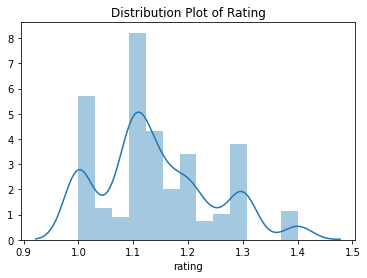

In [175]:
# Distribution Plot of Rating
sns.distplot(tb_mr['rating']);
plt.title('Distribution Plot of Rating');

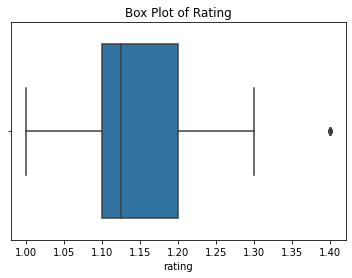

In [176]:
# Boxplot of Rating
sns.boxplot(tb_mr['rating']);
plt.title('Box Plot of Rating');

50% people gave rating on range Q1 and Q3, which is 1.10 - 1.20. There is one outlier of rating, which is 1.40.

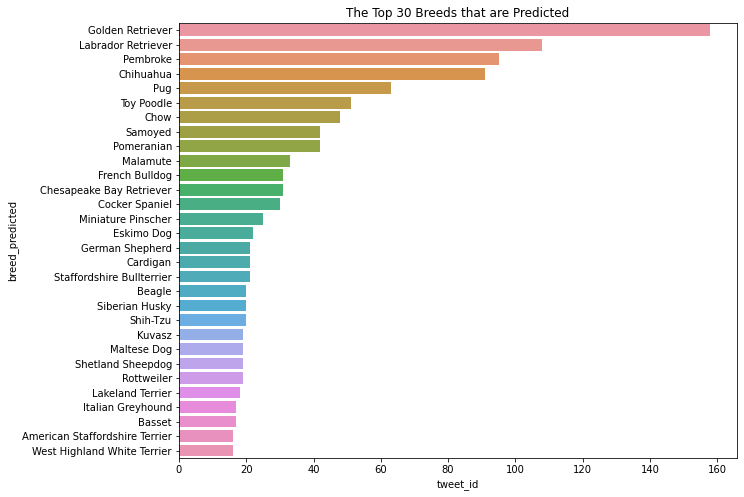

In [177]:
# The Top 30 Breeds that are Predicted
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="tweet_id", y="breed_predicted", data=total_breed[:30])
plt.title('The Top 30 Breeds that are Predicted');

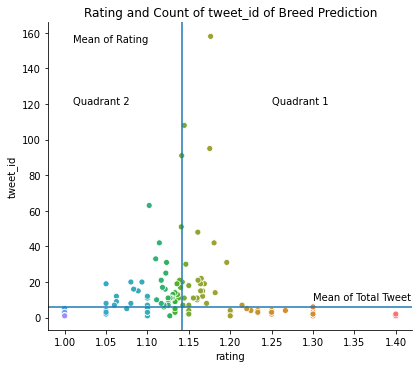

In [178]:
# Creating Quadrant 1 Breed: Breed that has Total Tweet above the average and the Rating that is above the average
# Creating Quadrant 2 Breed: Breed that has Total Tweet above the average and the Rating that is below the average 
g = sns.relplot(x="rating", y="tweet_id", hue='breed_predicted', data=tb_mr);
g._legend.remove()
g.fig.set_size_inches(10,5)
plt.axvline(x=tb_mr['rating'].mean())
plt.axhline(y=tb_mr['tweet_id'].mean())
plt.text(1.30, 10, "Mean of Total Tweet")
plt.text(1.01, 155, "Mean of Rating")
plt.text(1.25, 120, "Quadrant 1")
plt.text(1.01, 120, "Quadrant 2")
plt.title('Rating and Count of tweet_id of Breed Prediction')
plt.show()

Because, the legend is not enough to cover the Breed Predicted, I define Quadrant 1 and Quadrant 2 as the most popular predicted breed, and I explain the further below.

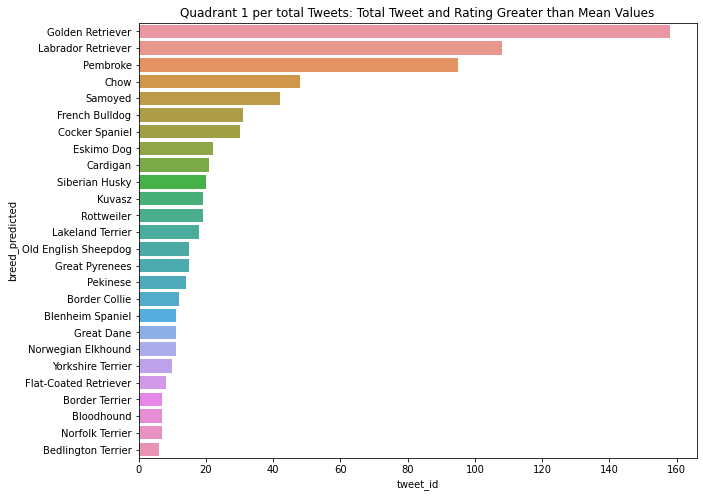

In [179]:
# Breeds that are included in Quadrant 1
kuadran_1 = tb_mr[(tb_mr['rating'] > tb_mr['rating'].mean()) & (tb_mr['tweet_id'] > tb_mr['tweet_id'].mean())].sort_values(by='tweet_id', ascending=False)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="tweet_id", y="breed_predicted", data=kuadran_1)
plt.title('Quadrant 1 per total Tweets: Total Tweet and Rating Greater than Mean Values');

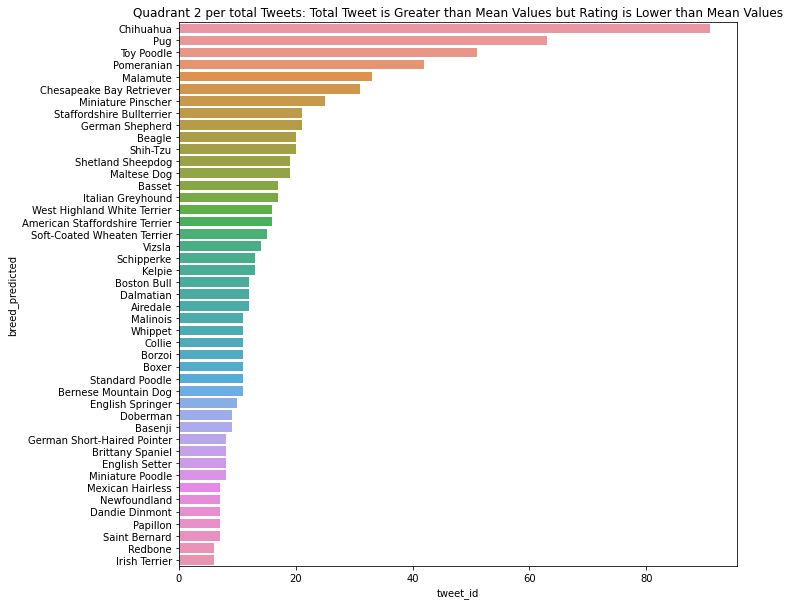

In [180]:
# Breeds that are included in Quadrant 2
kuadran_2 = tb_mr[(tb_mr['rating'] < tb_mr['rating'].mean()) & (tb_mr['tweet_id'] > tb_mr['tweet_id'].mean())].sort_values(by='tweet_id', ascending=False)
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="tweet_id", y="breed_predicted", data=kuadran_2)
plt.title('Quadrant 2 per total Tweets: Total Tweet is Greater than Mean Values but Rating is Lower than Mean Values');

As we can see from the graph, the Favored Predicted Breed is grouped into 2 Quadrants.
1. Quadrant 1 Breed: Breed that has Total Tweet above the average and the Rating that is above the average. Top 5 Breeds in this Quadrant are:
    - Golden Retriever
    - Labrador Retriever
    - Pembroke
    - Chow
    - Samoyed
2. Quadrant 2 Breed: Breed that has Total Tweet above the average and the Rating that is below the average. Top 5 Breeds in this Quadrant are:
    - Chihuahua
    - Pug
    - Toy Poodle
    - Pomeranian
    - Malamute

## Insight 2: The Average of Confidence Prediction of Predicted Breed

In [181]:
# Create Pivot Table of Average Confidence Prediction per Breed Predicted
confidence_breed = df.pivot_table(index='breed_predicted', values='confidence_prediction', aggfunc='mean').sort_values(by='confidence_prediction', ascending=False).reset_index()

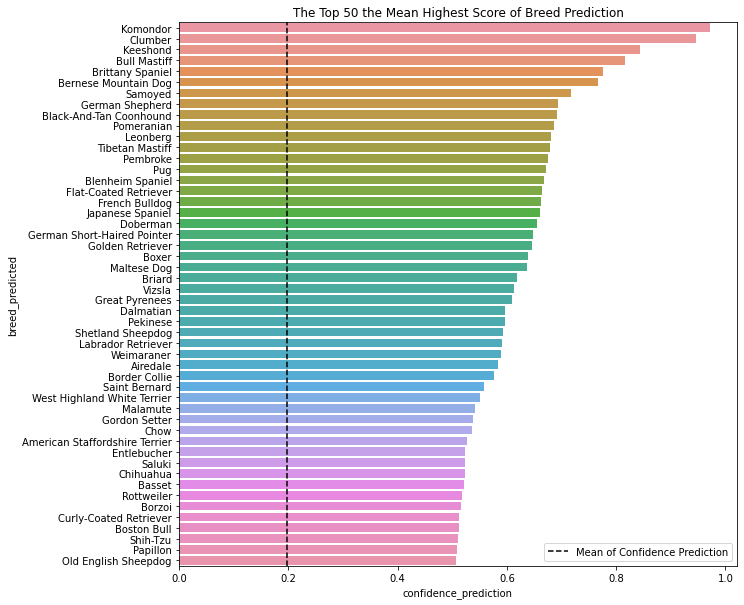

In [182]:
# The Top 50 the Mean Highest Score of Breed Prediction
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="confidence_prediction", y="breed_predicted", data=confidence_breed[:50])
plt.axvline(x=confidence_breed['confidence_prediction'].mean(), color='black', linestyle='dashed', label='Mean of Confidence Prediction')
plt.legend()
plt.title('The Top 50 the Mean Highest Score of Breed Prediction');

The Top 5 predicted breed which has been grouped into 2 Quadrants and are in the 50 Highest Prediction Score are:
- Samoyed
- Pomeranian
- Pembroke
- Pug
- Golden Retriever

## Insight 3: What are breed that are most Retweeted and Favorited VS Rating?

In [183]:
# Create Pivot Table of Retweet Count and Favorite Count per Breed Predicted
rt_fav_count = df.pivot_table(index='breed_predicted', values=['retweet_count', 'favorite_count'], aggfunc='sum').reset_index().sort_values(by='retweet_count', ascending=False)
rt_fav_count.head()

breed_predicted  favorite_count  retweet_count
130  Golden Retriever    1946934.0       587528.0     
171  Labrador Retriever  1274526.0       407573.0     
228  Pembroke            1039484.0       292052.0     
77   Chihuahua           746604.0        251807.0     
262  Samoyed             583906.0        203446.0

In [184]:
rt_fav_rating = rt_fav_count.merge(mean_rating, left_on='breed_predicted', right_on='breed_predicted', how='outer')
rt_fav_rating.head()

breed_predicted  favorite_count  retweet_count    rating
0  Golden Retriever    1946934.0       587528.0       1.176333
1  Labrador Retriever  1274526.0       407573.0       1.144444
2  Pembroke            1039484.0       292052.0       1.175281
3  Chihuahua           746604.0        251807.0       1.141429
4  Samoyed             583906.0        203446.0       1.180488

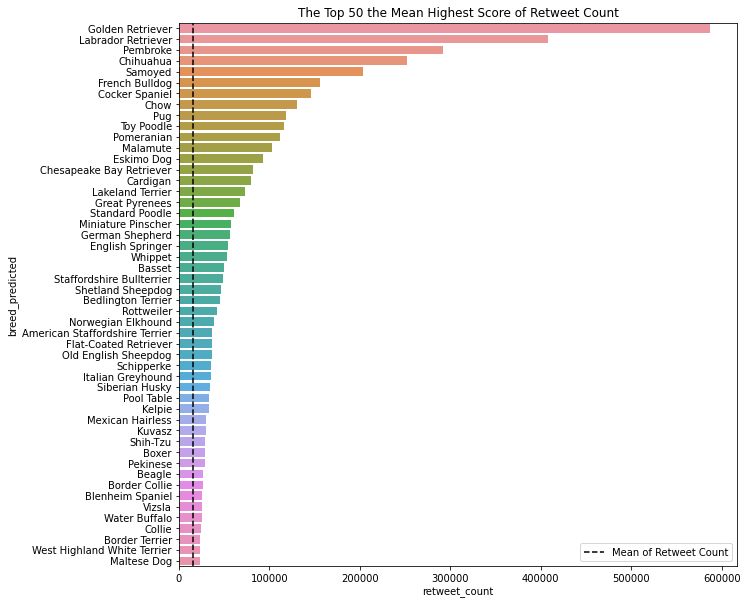

In [185]:
# The Top 50 the Mean Highest Score of Retweet Count
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="retweet_count", y="breed_predicted", data=rt_fav_count[:50])
plt.axvline(x=rt_fav_count['retweet_count'].mean(), color='black', linestyle='dashed', label='Mean of Retweet Count')
plt.legend()
plt.title('The Top 50 the Mean Highest Score of Retweet Count');

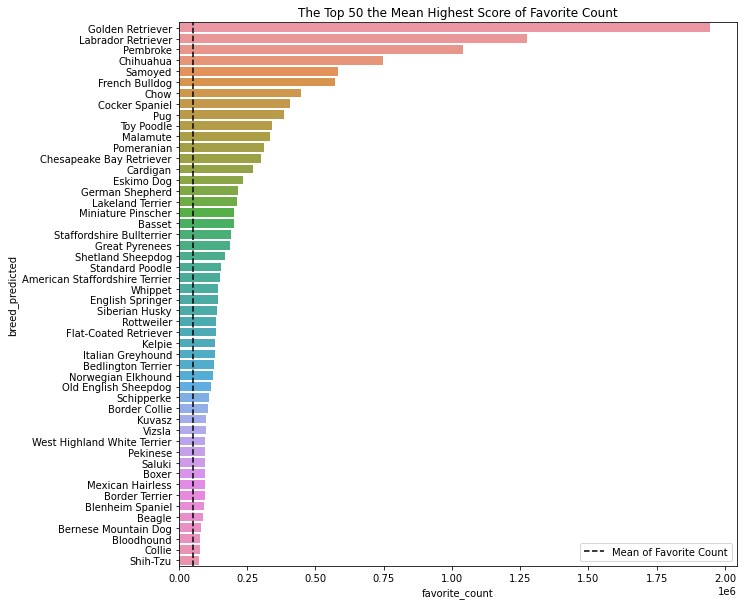

In [186]:
# The Top 50 the Mean Highest Score of Favorite Count
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="favorite_count", y="breed_predicted", data=rt_fav_count.sort_values(by='favorite_count', ascending=False)[:50])
plt.axvline(x=rt_fav_count['favorite_count'].mean(), color='black', linestyle='dashed', label='Mean of Favorite Count')
plt.legend()
plt.title('The Top 50 the Mean Highest Score of Favorite Count');

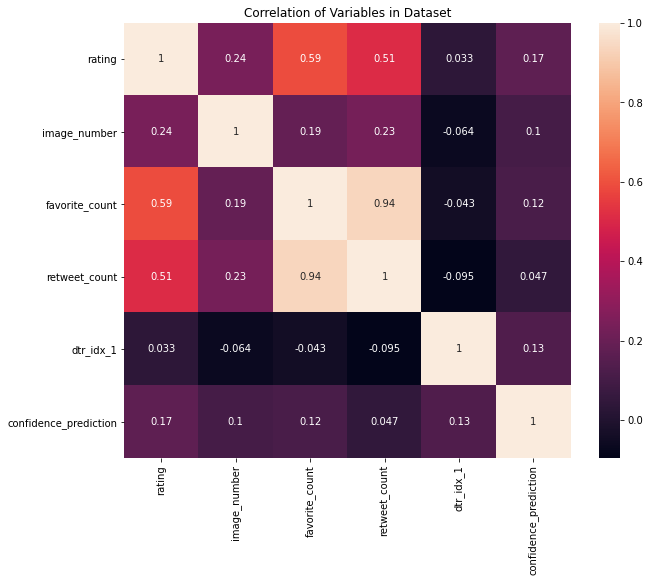

In [187]:
# Correlation of Variables in Dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df.dropna()[['rating', 'image_number', 'favorite_count', 'retweet_count', 'dtr_idx_1', 'confidence_prediction']].corr(), annot=True);
plt.title('Correlation of Variables in Dataset');

In [188]:
# 3D Plotly Graph of retweet_count, rating and favorite_count of predicted breed
fig = px.scatter_3d(rt_fav_rating, x='retweet_count', y='rating', z='favorite_count', color='breed_predicted', title='favorite_count VS retweet_count VS rating of Predicted Breed')
fig.show()

- As we can see from 3D Graph, the most 5 famous and likeable breeds based on favorite_count, retweet_count and rating are:
    - Golden Retriever
    - Labrador Retriever
    - Pembroke
    - Chihuahua
    - Samoyed
- However, the rating has quite high correlation value with retweet count and favorite count, which is, 0.59 and 0.51, respectively.

## Insight 4: Most Favorite Name of Dog

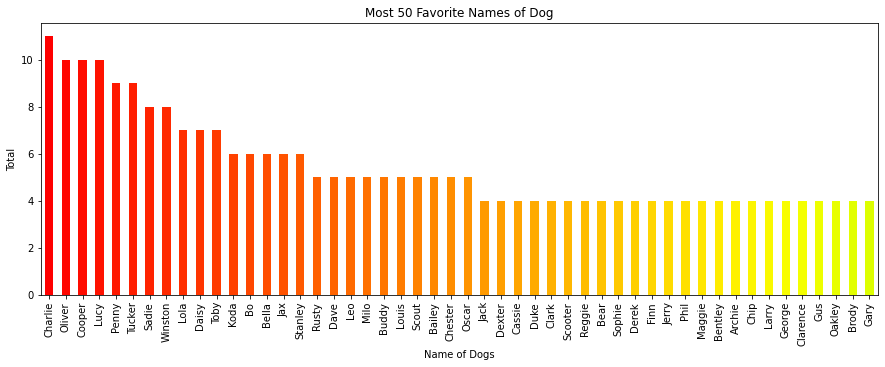

In [189]:
# Most 50 Favorite Names of Dog
cmap = plt.cm.hsv
colors = cmap(np.arange(len(df)) % cmap.N)
plt.figure(figsize=(15, 5))
ax = df.name.value_counts()[:50].plot(kind='bar', color=colors);
plt.ylabel('Total')
plt.xlabel('Name of Dogs')
plt.title('Most 50 Favorite Names of Dog');

## Insight 5: Timing Trends of Dog Tweets

In [190]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df['year_month'] = pd.to_datetime(df['timestamp']).dt.to_period('M')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1104: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



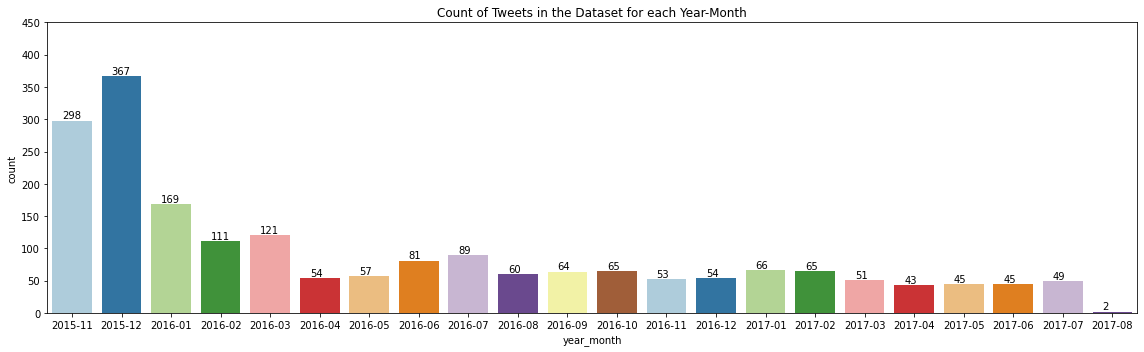

In [191]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "year_month", data = df.sort_values("year_month"), palette = "Paired", )
ax.set_title("Count of Tweets in the Dataset for each Year-Month");
ax.set_ylim(0, 450)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))
plt.tight_layout()
plt.show()

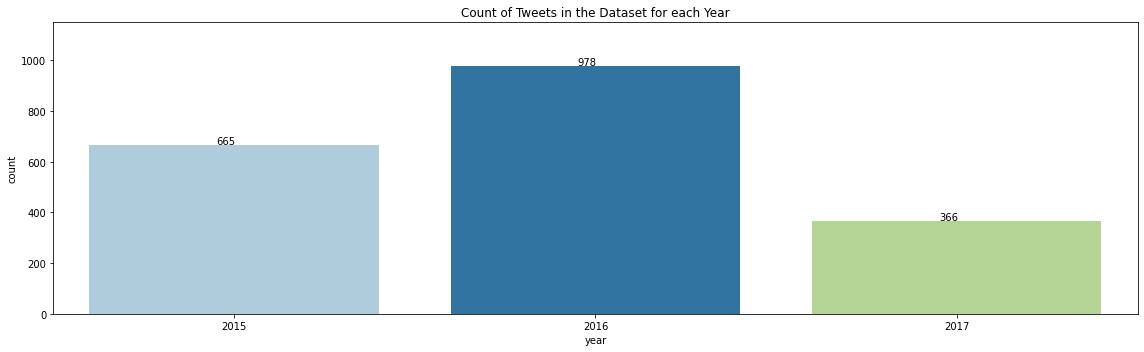

In [192]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "year", data = df.sort_values("year"), palette = "Paired", )
ax.set_title("Count of Tweets in the Dataset for each Year");
ax.set_ylim(0, 1150)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+4))
plt.tight_layout()
plt.show()

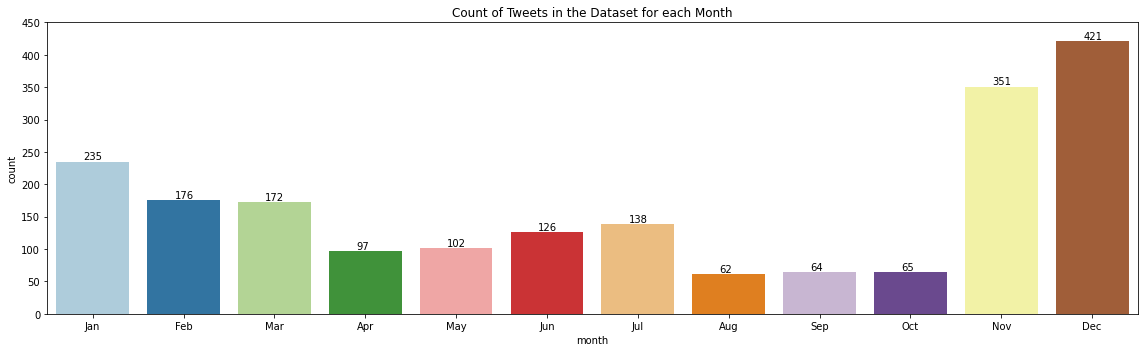

In [193]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "month", data = df.sort_values("month"), palette = "Paired", )
ax.set_title("Count of Tweets in the Dataset for each Month");
ax.set_ylim(0, 450)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+3))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [194]:
my_fav_rt = df.pivot_table(index='year_month', values=['favorite_count', 'retweet_count'], aggfunc='sum').reset_index()

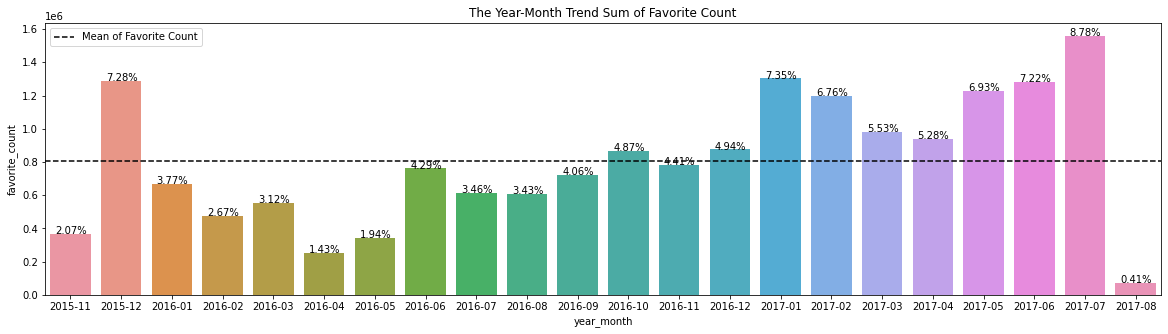

In [195]:
# The Month-Year Trend Sum of Favorite Count
plt.figure(figsize=(20, 5))
ax = sns.barplot(x="year_month", y="favorite_count", data=my_fav_rt)
for p in ax.patches:
    ax.annotate('{:.2%}'.format(p.get_height()/df['favorite_count'].sum()), (p.get_x()+0.1, p.get_height()+5))
plt.axhline(y=my_fav_rt['favorite_count'].mean(), color='black', linestyle='dashed', label='Mean of Favorite Count')
plt.legend()
plt.title('The Year-Month Trend Sum of Favorite Count');
plt.show()

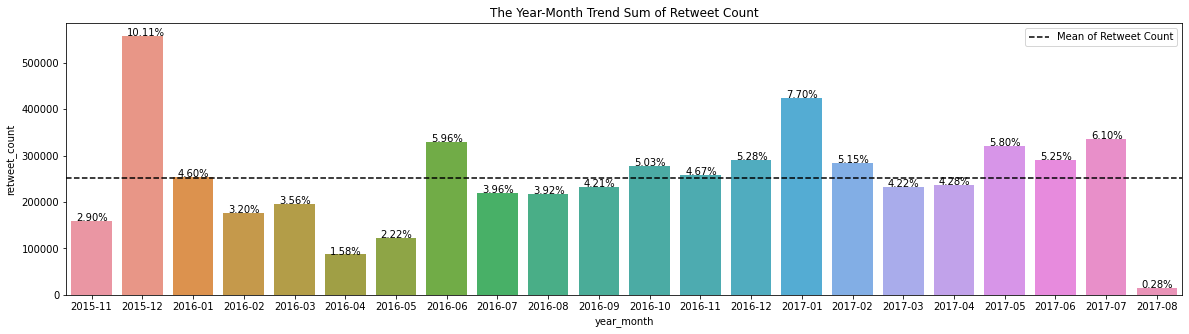

In [196]:
# The Month-Year Trend Sum of Retweet Count
plt.figure(figsize=(20, 5))
ax = sns.barplot(x="year_month", y="retweet_count", data=my_fav_rt)
for p in ax.patches:
    ax.annotate('{:.2%}'.format(p.get_height()/df['retweet_count'].sum()), (p.get_x()+0.1, p.get_height()+5))
plt.axhline(y=my_fav_rt['retweet_count'].mean(), color='black', linestyle='dashed', label='Mean of Retweet Count')
plt.legend()
plt.title('The Year-Month Trend Sum of Retweet Count');
plt.show()

## Insight 6: What is the most favorable dog category and breed?

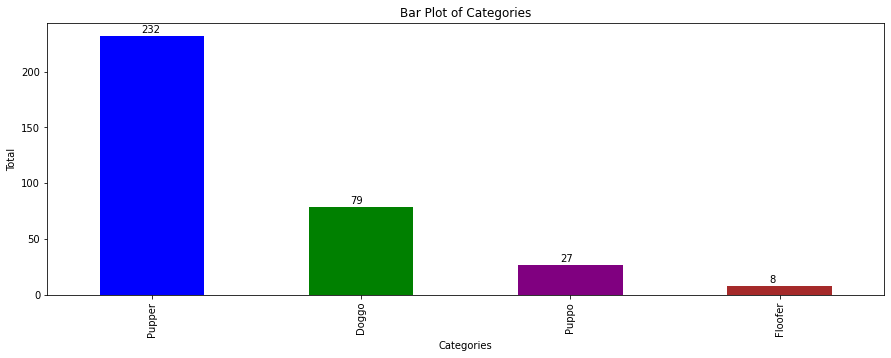

In [231]:
cmap = plt.cm.hsv
colors = cmap(np.arange(len(df)) % cmap.N)
plt.figure(figsize=(15, 5))
ax = df.categories.value_counts().plot(kind='bar', color=['b', 'g', 'purple', 'brown']);
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))
plt.ylabel('Total')
plt.xlabel('Categories')
plt.title('Bar Plot of Categories');

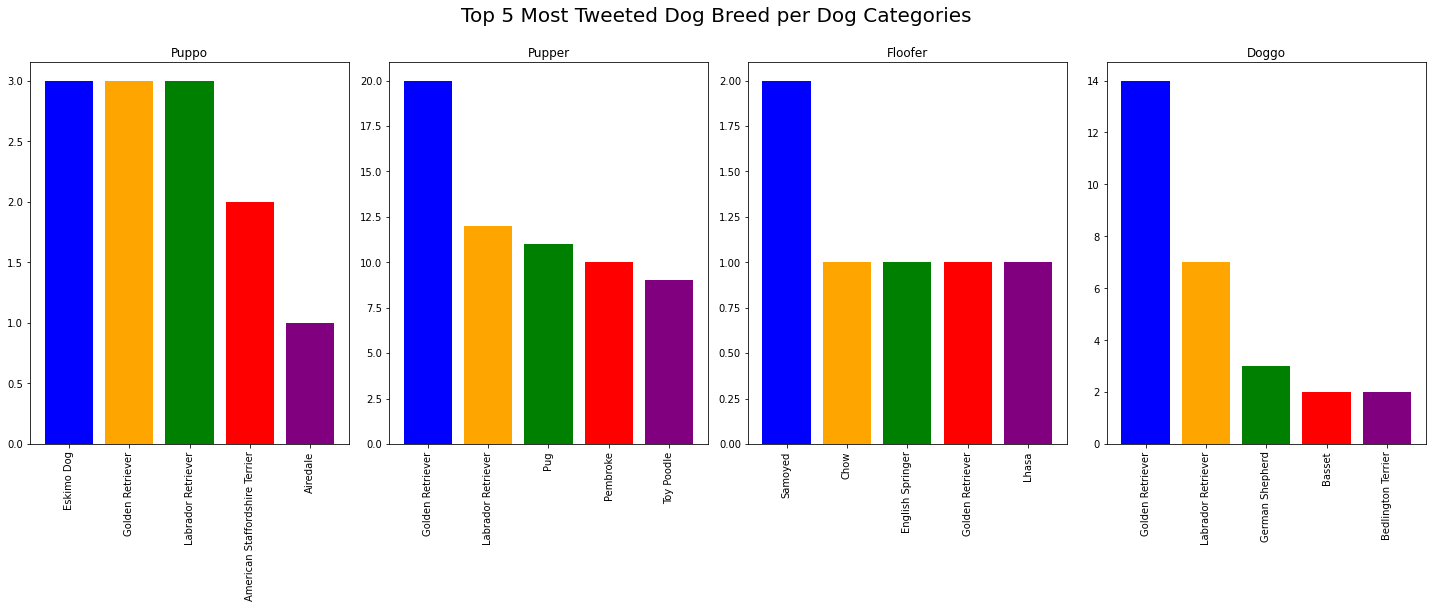

In [223]:
most_cat_breed_tot_tweet = pd.DataFrame(df.groupby(['categories', 'breed_predicted'])['tweet_id'].count()).sort_values(by=['categories', 'tweet_id'], ascending=False).groupby('categories').head(5).reset_index()

k = 0
j = 0
plt.figure(figsize=(20, 8))
for i in most_cat_breed_tot_tweet['categories'].unique():
    j += 1
    plt.subplot(1, 4, j)
    plt.subplots_adjust(bottom=0.1)
    plt.bar(most_cat_breed_tot_tweet[most_cat_breed_tot_tweet['categories'] == i]['breed_predicted'], 
            most_cat_breed_tot_tweet[most_cat_breed_tot_tweet['categories'] == i]['tweet_id'], 
            color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title('{}'.format(most_cat_breed_tot_tweet['categories'].unique()[k]))
    k += 1
    plt.xticks(rotation=90);
    plt.tight_layout()
plt.suptitle('Top 5 Most Tweeted Dog Breed per Dog Categories', y=1.05, fontsize=20)
plt.show()

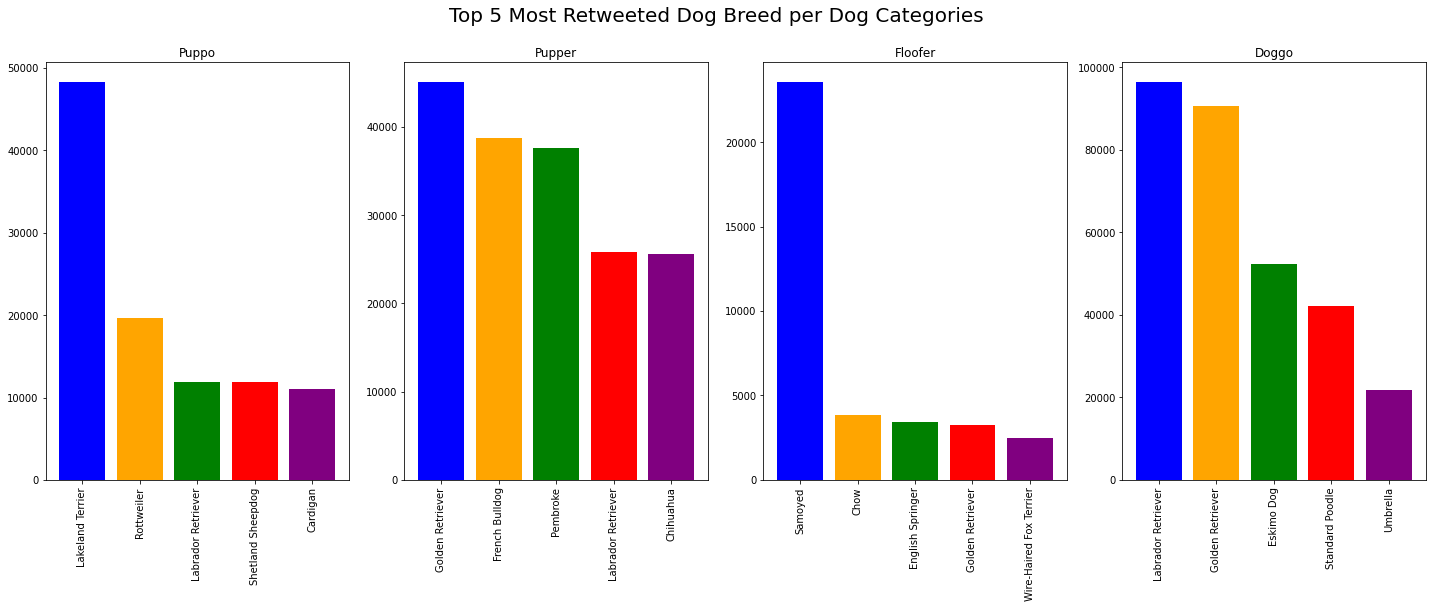

In [224]:
most_cat_breed_rt_sum = pd.DataFrame(df.groupby(['categories', 'breed_predicted'])['retweet_count'].sum()).sort_values(by=['categories', 'retweet_count'], ascending=False).groupby('categories').head(5).reset_index()

k = 0
j = 0
plt.figure(figsize=(20, 8))
for i in most_cat_breed_rt_sum['categories'].unique():
    j += 1
    plt.subplot(1, 4, j)
    plt.subplots_adjust(bottom=0.1)
    plt.bar(most_cat_breed_rt_sum[most_cat_breed_rt_sum['categories'] == i]['breed_predicted'], 
            most_cat_breed_rt_sum[most_cat_breed_rt_sum['categories'] == i]['retweet_count'], 
            color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title('{}'.format(most_cat_breed_rt_sum['categories'].unique()[k]))
    k += 1
    plt.xticks(rotation=90);
    plt.tight_layout()
plt.suptitle('Top 5 Most Retweeted Dog Breed per Dog Categories', y=1.05, fontsize=20)
plt.show()

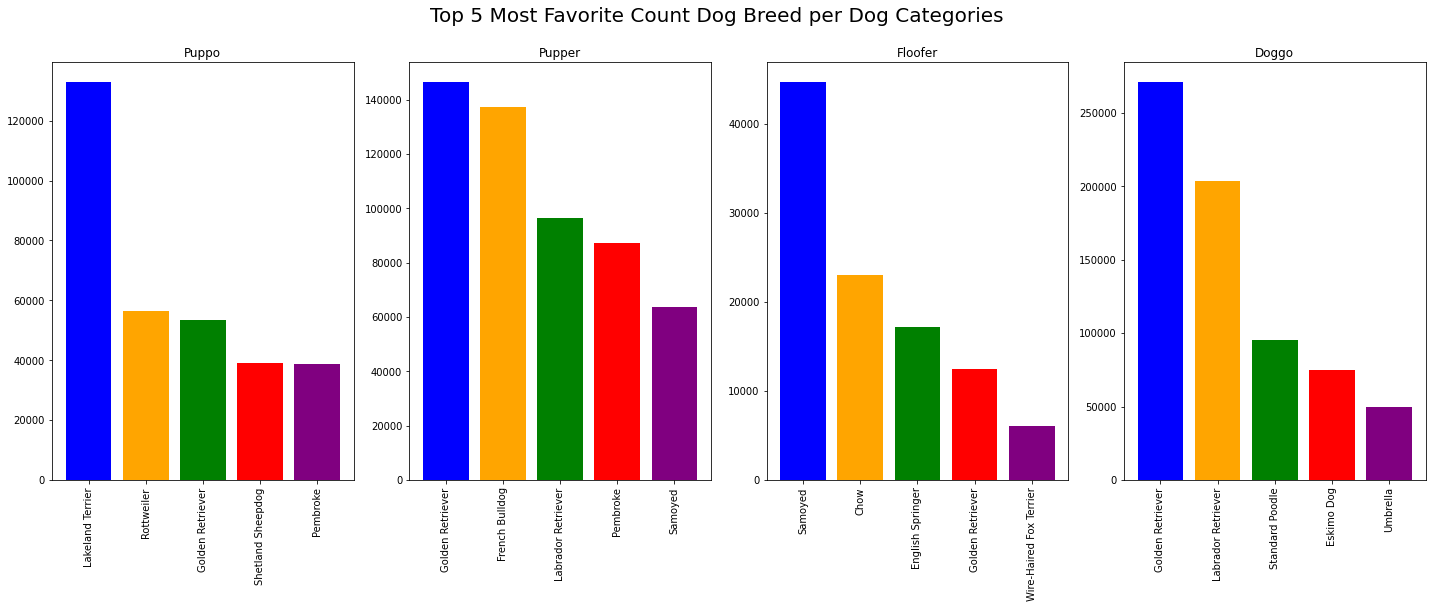

In [225]:
most_cat_breed_fav_sum = pd.DataFrame(df.groupby(['categories', 'breed_predicted'])['favorite_count'].sum()).sort_values(by=['categories', 'favorite_count'], ascending=False).groupby('categories').head(5).reset_index()

k = 0
j = 0
plt.figure(figsize=(20, 8))
for i in most_cat_breed_fav_sum['categories'].unique():
    j += 1
    plt.subplot(1, 4, j)
    plt.subplots_adjust(bottom=0.1)
    plt.bar(most_cat_breed_fav_sum[most_cat_breed_fav_sum['categories'] == i]['breed_predicted'], 
            most_cat_breed_fav_sum[most_cat_breed_fav_sum['categories'] == i]['favorite_count'], 
            color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title('{}'.format(most_cat_breed_fav_sum['categories'].unique()[k]))
    k += 1
    plt.xticks(rotation=90);
    plt.tight_layout()
plt.suptitle('Top 5 Most Favorite Count Dog Breed per Dog Categories', y=1.05, fontsize=20)
plt.show()

## Summary and Conclusions

We have done data wrangling process, including Data Gathering of 3 datasets which are Twitter Archive File (manually downloaded via Udacity webpage), Image Prediction Twitter (programmatically downloaded) and Twitter API dataset (manually downloaded via udacity webpage). Furthermore, the data assessing and data cleaning is conducted in order to construct the clean and trustworthy dataset that will be useful for data analysis or data modeling. Finally, the data analysis is conducted which cover:
1. The most popular predicted breed is grouped into 2 Quadrants.
    - Quadrant 1 Breed: Breed that has Total Tweet above the average and the Rating that is above the average. Top 5 Breeds in this Quadrant are:
        - Golden Retriever
        - Labrador Retriever
        - Pembroke
        - Chow
        - Samoyed
    - Quadrant 2 Breed: Breed that has Total Tweet above the average and the Rating that is below the average. Top 5 Breeds in this Quadrant are:
        - Chihuahua
        - Pug
        - Toy Poodle
        - Pomeranian
        - Malamute
2. The Top 5 predicted breed which has been grouped into 2 Quadrants and are in the 50 Highest Image Prediction Score are:
    - Samoyed
    - Pomeranian
    - Pembroke
    - Pug
    - Golden Retriever
3. As seen from 3D Graph, the most 5 famous and likeable breeds based on favorite_count, retweet_count and rating are:
    - Golden Retriever
    - Labrador Retriever
    - Pembroke
    - Chihuahua
    - Samoyed
4. However, the rating has quite high correlation value with retweet count and favorite count, which is, 0.59 and 0.51, respectively.
5. The Top 5 Most Used Name for Dogs are:
    - Charlie
    - Oliver
    - Cooper
    - Lucy
    - Penny
6. The text tweet is increasing in 2 months, but fluctuating until the end of the dataset. The Most Text Tweet is on November and December.
7. The most categories of dog in the text tweet is Pupper. However, the most tweeted dog, the most favorite count and retweet count dogs are shown on the graphic.

In [232]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0